In [265]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 4.9 MB/s eta 0:00:00a 0:00:01


# Normalization 

In [49]:
feature_matrix_pt = pd.read_csv("/kaggle/input/raw-data/output_with_params_pt.csv")
feature_matrix_pr = pd.read_csv("/kaggle/input/raw-data/output_with_params_pr.csv")

In [52]:
# 1. Создаем столбец с длиной текста в словах
def get_text_length(text):
    if isinstance(text, str):
        return len(text.split())
    else:
        return 0  # Обработка NaN и нестроковых значений

# Применяем функцию к столбцу с текстом
feature_matrix_pt['text_length'] = feature_matrix_pt['Текст открытки'].apply(get_text_length)
feature_matrix_pr['text_length'] = feature_matrix_pr['text'].apply(get_text_length)

In [53]:
feature_matrix_pt.drop(
    feature_matrix_pt[feature_matrix_pt['text_length'] <= 2].index,
    inplace=True
)
feature_matrix_pt.reset_index(drop=True, inplace=True)


feature_matrix_pr.drop(
    feature_matrix_pr[feature_matrix_pr['text_length'] <= 2].index,
    inplace=True
)
feature_matrix_pr.reset_index(drop=True, inplace=True)

In [54]:
# 2. Определим, какие колонки являются признаками 
meta_columns = ['text', 'year', 'decade', 'text_length']
feature_columns = [col for col in feature_matrix_pr.columns if col not in meta_columns]

In [179]:
import numpy as np

# Признаки, которые НЕ нужно нормализовать (уже индексные, средние и т.п.)
potentially_problematic_columns = [
    'noun_abstr_index_abs',
    'adj_abstr_index_abs',
    'flesch_kincaid_index_abs',
    'avg_vp_length_abs',
    'avg_np_length_abs',
    'max_tree_depth_abs',
    'word length_abs',
    'type-token ratio_abs',
    'mean_sentence_length_abs'
]

# Копируем матрицу признаков
normalized_feature_matrix_pt = feature_matrix_pt.copy()

# Удаляем строки с подозрительно высокими частотами (только для частотных признаков)
rows_to_keep = []
for index, row in feature_matrix_pt.iterrows():
    keep_row = True
    for feature in feature_columns:
        if feature not in potentially_problematic_columns:
            try:
                dif = row[feature] / (row['text_length'] + 1)
                if dif > 1:
                    keep_row = False
                    break
            except ZeroDivisionError:
                keep_row = False
                break
    if keep_row:
        rows_to_keep.append(index)

# Оставляем только нормальные строки
normalized_feature_matrix_pt = normalized_feature_matrix_pt.iloc[rows_to_keep]

# Применяем нормализацию по Байберу ТОЛЬКО к частотным признакам
for feature in feature_columns:
    if feature not in potentially_problematic_columns:
        normalized_feature_matrix_pt[feature] = (
            normalized_feature_matrix_pt[feature] / (normalized_feature_matrix_pt['text_length'] + 1) * 100
        ).replace([np.inf, -np.inf], np.nan).round(3)
    else:
        # Оставляем как есть
        normalized_feature_matrix_pt[feature] = normalized_feature_matrix_pt[feature]

# Сброс индекса
normalized_feature_matrix_pt = normalized_feature_matrix_pt.reset_index(drop=True)

# Готово
normalized_feature_matrix_pt


,Текст открытки,Год открытки,decade,first_person_pronouns_sing_abs,first_person_pronouns_plur_abs,second_person_pronouns_sing_abs,second_person_pronouns_plur_abs,third_person_pronouns_masc_abs,third_person_pronouns_fem_abs,third_person_pronouns_neut_abs,...,adj_degree_super_abs,full_adj_abs,shrot_adj_abs,adv_degree_pos_abs,adv_degree_comp_abs,quant_num_abs,anum_num_abs,dim_nouns_abs,dim_adj_abs,text_length
0,"{Милый Жоржик! Простите, голубчик, за молчание...",1906,1900,3.774,0.943,0.000,1.887,3.774,0.000,0.0,...,0.000,16.981,0.000,8.491,0.000,0.000,0.0,7.547,0.000,105
1,Добрейший Паша! Будь добр вышли мне на консерв...,1910,1910,2.326,0.000,2.326,0.000,0.000,0.000,0.0,...,0.000,11.628,2.326,2.326,0.000,0.000,0.0,9.302,2.326,42
2,Милая моя Олечка! Открытку твою получила. Спас...,1910,1910,0.000,2.667,2.667,0.000,0.000,1.333,0.0,...,0.000,26.667,1.333,17.333,1.333,2.667,0.0,12.000,1.333,74
3,Ст. Челябинск 18/IV Христос Воскресе! От душ...,1910,1910,6.122,2.041,0.000,2.041,0.000,0.000,0.0,...,0.000,14.286,4.082,6.122,0.000,4.082,0.0,2.041,2.041,48
4,Дорогие [? Папашенька] Саша Марфуша и Ваня! По...,1906,1900,3.448,0.000,0.000,6.897,3.448,0.000,0.0,...,0.000,13.793,6.897,0.000,0.000,0.000,0.0,0.000,0.000,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39674,Дорогие Лыткаринцы! Поздравляем с Новым годом!...,1984,1980,1.562,0.000,0.000,1.562,0.000,0.000,0.0,...,0.000,18.750,1.562,7.812,0.000,0.000,0.0,3.125,0.000,63
39675,"С новым годом! Милая, и дорогая, Тома. От всей...",1988,1980,0.000,0.000,0.000,0.000,0.000,0.000,0.0,...,0.000,29.412,0.000,5.882,0.000,0.000,0.0,0.000,0.000,33
39676,Дорогие мой [^мои] всех вас я поздравляю с нов...,1981,1980,3.704,0.000,0.000,7.407,0.000,0.000,0.0,...,0.000,25.926,0.000,3.704,0.000,3.704,0.0,0.000,3.704,26
39677,Тома! Сестренка ты моя Дорогая!!! От всего сер...,1985,1980,2.128,0.000,4.255,4.255,0.000,0.000,0.0,...,2.128,46.809,0.000,2.128,0.000,0.000,0.0,4.255,4.255,46


In [180]:
import numpy as np

# Признаки, которые НЕ нужно нормализовать (уже индексные, средние и т.п.)
potentially_problematic_columns = [
    'noun_abstr_index_abs',
    'adj_abstr_index_abs',
    'flesch_kincaid_index_abs',
    'avg_vp_length_abs',
    'avg_np_length_abs',
    'max_tree_depth_abs',
    'word length_abs',
    'type-token ratio_abs',
    'mean_sentence_length_abs'
]

# Копируем матрицу признаков
normalized_feature_matrix_pr = feature_matrix_pr.copy()

# Удаляем строки с подозрительно высокими частотами (только для частотных признаков)
rows_to_keep = []
for index, row in feature_matrix_pr.iterrows():
    keep_row = True
    for feature in feature_columns:
        if feature not in potentially_problematic_columns:
            try:
                dif = row[feature] / (row['text_length'] + 1)
                if dif > 1:
                    keep_row = False
                    break
            except ZeroDivisionError:
                keep_row = False
                break
    if keep_row:
        rows_to_keep.append(index)

# Оставляем только нормальные строки
normalized_feature_matrix_pr = normalized_feature_matrix_pr.iloc[rows_to_keep]

# Применяем нормализацию по Байберу ТОЛЬКО к частотным признакам
for feature in feature_columns:
    if feature not in potentially_problematic_columns:
        normalized_feature_matrix_pr[feature] = (
            normalized_feature_matrix_pr[feature] / (normalized_feature_matrix_pr['text_length'] + 1) * 100
        ).replace([np.inf, -np.inf], np.nan).round(3)
    else:
        # Оставляем как есть
        normalized_feature_matrix_pr[feature] = normalized_feature_matrix_pr[feature]

# Сброс индекса
normalized_feature_matrix_pr = normalized_feature_matrix_pr.reset_index(drop=True)

# Готово
normalized_feature_matrix_pr


,year,text,decade,first_person_pronouns_sing_abs,first_person_pronouns_plur_abs,second_person_pronouns_sing_abs,second_person_pronouns_plur_abs,third_person_pronouns_masc_abs,third_person_pronouns_fem_abs,third_person_pronouns_neut_abs,...,adj_degree_super_abs,full_adj_abs,shrot_adj_abs,adv_degree_pos_abs,adv_degree_comp_abs,quant_num_abs,anum_num_abs,dim_nouns_abs,dim_adj_abs,text_length
0,1900,"[Москва]<com id=""15215756731490""/> У папá...",1900,0.472,0.000,0.0,0.000,2.830,0.943,0.0,...,0.000,16.981,0.943,2.358,0.000,0.472,0.000,9.906,2.830,211
1,1900,"Март, после 16-го, 1900 «У Горького, — говорил...",1900,2.667,0.000,0.0,0.000,5.333,0.000,0.0,...,0.000,18.667,1.333,4.000,0.000,2.667,1.333,6.667,0.000,74
2,1900,"30–31 марта 1900 Если моя жена нечестная, непо...",1900,0.000,0.000,0.0,0.000,2.941,2.941,0.0,...,0.000,23.529,0.000,0.000,0.000,0.000,0.000,0.000,2.941,33
3,1900,6 апреля 1900 Дорн в «Чайке» говорит: «Что-то ...,1900,2.222,0.000,0.0,0.000,6.667,0.000,0.0,...,0.000,13.333,4.444,6.667,2.222,2.222,0.000,2.222,4.444,44
4,1900,"Май 1900 А.П. Чехов говорит, что Анна Васильев...",1900,0.000,0.000,0.0,0.000,0.000,4.167,0.0,...,0.000,12.500,0.000,0.000,0.000,0.000,0.000,8.333,0.000,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19076,2005,По «Свободе» в своей программе Шендерович два...,2000,2.730,0.000,0.0,0.000,2.048,0.683,0.0,...,0.000,16.382,3.413,5.461,0.000,1.706,0.341,5.461,5.119,292
19077,2005,"Фет, которого перечитывал три недели назад, п...",2000,1.744,0.581,0.0,0.581,1.163,0.581,0.0,...,0.581,11.047,1.163,9.884,0.000,2.907,0.000,2.907,1.744,171
19078,2005,"По «Свободе» сказали, что Томас Манн был горд...",2000,0.000,0.000,0.0,0.000,1.786,0.000,0.0,...,0.000,5.357,5.357,1.786,0.000,1.786,0.000,3.571,0.000,55
19079,2005,Как влиятельно все же массовое искусство. По ...,2000,0.637,1.274,0.0,0.637,0.637,0.000,0.0,...,0.000,11.465,0.000,6.369,0.000,0.637,1.274,1.911,0.637,156


In [259]:
normalized_feature_matrix_pr.to_csv('normalized_feature_matrix_pt.csv')
normalized_feature_matrix_pr.to_csv('normalized_feature_matrix_pr.csv')

In [262]:
feature_columns = [col for col in normalized_feature_matrix_pr.columns if col not in ['Текст открытки', 'decade', 'год', 'text_length', 'Unnamed: 0', 'year', 'text', 'other_coordination_abs', 'type']]
len(feature_columns)

102

In [263]:
for col in feature_columns:
        normalized_feature_matrix_pr[col] = normalized_feature_matrix_pr[col].fillna(0).astype('float64')

nan_cols = normalized_feature_matrix_pr.columns[normalized_feature_matrix_pr.isnull().any()]
print("Столбцы, содержащие NaN:", nan_cols)

for col in feature_columns:
        normalized_feature_matrix_pr[col] = normalized_feature_matrix_pr[col].fillna(0).astype('float64')

nan_cols = normalized_feature_matrix_pr.columns[normalized_feature_matrix_pr.isnull().any()]
print("Столбцы, содержащие NaN:", nan_cols)

Столбцы, содержащие NaN: Index([], dtype='object')
Столбцы, содержащие NaN: Index([], dtype='object')


In [266]:
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
import pingouin as pg

def analyze_large_corpora(corpus1_df, corpus2_df, features, chunk_size=10000):
    """
    Анализ предзагруженных корпусов
    
    Параметры:
    corpus1_df, corpus2_df - предзагруженные DataFrame
    features - список признаков для анализа
    chunk_size - размер чанка для обработки (по умолчанию 10,000)
    """
    
    # Инициализация результатов
    results = {feature: {'mean1': 0.0, 'mean2': 0.0, 'd': 0.0, 'p': 1.0} 
               for feature in features}
    
    # Обработка корпуса 1
    total1 = 0
    for i in range(0, len(corpus1_df), chunk_size):
        chunk = corpus1_df.iloc[i:i+chunk_size]
        total1 += len(chunk)
        for feature in features:
            results[feature]['mean1'] += chunk[feature].sum()

    # Обработка корпуса 2
    total2 = 0
    for i in range(0, len(corpus2_df), chunk_size):
        chunk = corpus2_df.iloc[i:i+chunk_size]
        total2 += len(chunk)
        for feature in features:
            results[feature]['mean2'] += chunk[feature].sum()

    # Расчет финальных средних
    for feature in features:
        results[feature]['mean1'] /= total1 if total1 > 0 else 1
        results[feature]['mean2'] /= total2 if total2 > 0 else 1

    # Расчет статистик
    p_values = []
    cohens_d_values = []
    for feature in features:
        # Данные для признака
        data1 = corpus1_df[feature].values
        data2 = corpus2_df[feature].values
        
        # t-тест Уэлча
        try:
            _, p = ttest_ind(data1, data2, equal_var=False, nan_policy='omit')
        except:
            p = 1.0
        
        # Cohen's d
        try:
            # n1, n2 = len(data1), len(data2)
            # var1 = np.nanvar(data1, ddof=1)
            # var2 = np.nanvar(data2, ddof=1)
            # pooled_var = ((n1-1)*var1 + (n2-1)*var2) / (n1 + n2 - 2)
            # pooled_std = np.sqrt(pooled_var) if pooled_var > 0 else 0
            # d = (np.nanmean(data1) - np.nanmean(data2)) / pooled_std if pooled_std != 0 else 0
            d = pg.compute_effsize(data1, data2, eftype='cohen')
        except:
            d = 0
        
        p_values.append(p)
        cohens_d_values.append(d)

    # Поправка FDR
    p_values = [1.0 if np.isnan(p) else p for p in p_values]
    _, p_corrected, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')

    # Сбор результатов
    return pd.DataFrame({
        'feature': features,
        'mean_corpus1': [results[f]['mean1'] for f in features],
        'mean_corpus2': [results[f]['mean2'] for f in features],
        'p_value': p_values,
        'p_corrected': p_corrected,
        'cohens_d': cohens_d_values
    })

In [268]:
# Анализ
results = analyze_large_corpora(normalized_feature_matrix_pt, normalized_feature_matrix_pr, feature_columns)
results

,feature,mean_corpus1,mean_corpus2,p_value,p_corrected,cohens_d
0,first_person_pronouns_sing_abs,0.991427,1.759939,0.000000e+00,0.000000e+00,-0.380405
1,first_person_pronouns_plur_abs,0.431320,0.646669,6.242482e-91,8.604502e-91,-0.181187
2,second_person_pronouns_sing_abs,1.634828,0.080217,0.000000e+00,0.000000e+00,0.648764
3,second_person_pronouns_plur_abs,2.680394,0.071394,0.000000e+00,0.000000e+00,0.972063
4,third_person_pronouns_masc_abs,0.167111,0.954459,0.000000e+00,0.000000e+00,-0.748769
...,...,...,...,...,...,...
97,adv_degree_comp_abs,0.148720,0.248778,1.039460e-67,1.342088e-67,-0.148764
98,quant_num_abs,2.242231,3.050765,1.180124e-82,1.583850e-82,-0.182463
99,anum_num_abs,0.286506,0.363943,4.217409e-16,4.675824e-16,-0.072977
100,dim_nouns_abs,3.809919,6.898208,0.000000e+00,0.000000e+00,-0.758944


In [269]:
# Фильтрация значимых результатов
significant = results[(results['p_corrected'] < 0.05) & (abs(results['cohens_d']) >= 0.5)]
significant

,feature,mean_corpus1,mean_corpus2,p_value,p_corrected,cohens_d
2,second_person_pronouns_sing_abs,1.634828,0.080217,0.0,0.0,0.648764
3,second_person_pronouns_plur_abs,2.680394,0.071394,0.0,0.0,0.972063
4,third_person_pronouns_masc_abs,0.167111,0.954459,0.0,0.0,-0.748769
7,third_person_pronouns_plur_abs,0.068281,0.373224,0.0,0.0,-0.532928
9,prepositions_abs,8.619868,11.073743,0.0,0.0,-0.577365
11,indefinite_pronouns_abs,0.033136,0.248285,0.0,0.0,-0.507722
16,noun_abstr_index_abs,-0.076950,0.123470,0.0,0.0,-0.666202
17,adj_abstr_index_abs,0.696229,0.332342,0.0,0.0,0.638238
19,propr_name_abs,9.690788,5.730926,0.0,0.0,0.670225
27,type-token ratio_abs,92.980565,85.012520,0.0,0.0,0.967295


In [185]:
normalized_feature_matrix_pr['type'] = 'diary'
normalized_feature_matrix_pt['type'] = 'postcard'

normalized_feature_matrix_pt.rename(columns={"Текст открытки": "text", "Год открытки": "year"}, inplace=True)
cols = normalized_feature_matrix_pr.columns.tolist()
cols[0], cols[1] = cols[1], cols[0]
normalized_feature_matrix_pr = normalized_feature_matrix_pr[cols]

In [187]:
normalized_feature_matrix_pt.columns == normalized_feature_matrix_pr.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [190]:
def concatenate_dataframes(df1: pd.DataFrame, df2: pd.DataFrame) -> pd.DataFrame:
    
    if df1.columns.tolist() != df2.columns.tolist():
        print("Ошибка: DataFrame имеют разные колонки.")
        return None
    
    concatenated_df = pd.concat([df1, df2], ignore_index=True)
    return concatenated_df

In [191]:
result_df = concatenate_dataframes(normalized_feature_matrix_pt, normalized_feature_matrix_pr)

# United factor analysis 

In [194]:
counts = result_df.groupby(['decade', 'type']).size().unstack(fill_value=0)
print("Исходное распределение:\n", counts)

Исходное распределение:
 type    diary  postcard
decade                 
1900     1946      4040
1910     2647      9820
1920      961       851
1930     2090       813
1940     4328       953
1950      765      2185
1960     2067      6072
1970     1729      6695
1980     1781      6312
1990      565      1070
2000      202       267
2010        0       229
2020        0       372


In [195]:
min_count = (
    result_df.groupby(['decade', 'type']).size().min()
)

# Найдём только те декады, где есть достаточно и того, и другого
valid_decades = result_df.groupby(['decade', 'type']).size().unstack().dropna()
valid_decades = valid_decades[(valid_decades['diary'] >= min_count) & (valid_decades['postcard'] >= min_count)].index

# Теперь выборка
balanced_samples = []

for decade in valid_decades:
    for text_type in ['postcard', 'diary']:
        subset = result_df[(result_df['decade'] == decade) & (result_df['type'] == text_type)]
        sampled = subset.sample(n=min_count, random_state=42)
        balanced_samples.append(sampled)

df_balanced = pd.concat(balanced_samples, ignore_index=True)

print("\nРаспределение после выравнивания:\n", 
      df_balanced.groupby(['decade', 'type']).size().unstack())



Распределение после выравнивания:
 type    diary  postcard
decade                 
1900      202       202
1910      202       202
1920      202       202
1930      202       202
1940      202       202
1950      202       202
1960      202       202
1970      202       202
1980      202       202
1990      202       202
2000      202       202


In [196]:
df_balanced

,text,year,decade,first_person_pronouns_sing_abs,first_person_pronouns_plur_abs,second_person_pronouns_sing_abs,second_person_pronouns_plur_abs,third_person_pronouns_masc_abs,third_person_pronouns_fem_abs,third_person_pronouns_neut_abs,...,full_adj_abs,shrot_adj_abs,adv_degree_pos_abs,adv_degree_comp_abs,quant_num_abs,anum_num_abs,dim_nouns_abs,dim_adj_abs,text_length,type
0,{Поздравляю <u>[нрзб]</u>}{Поздравляю вас доро...,1906,1900,2.564,0.000,0.000,2.564,0.000,0.000,0.000,...,10.256,2.564,5.128,0.000,0.000,0.00,5.128,0.000,38,postcard
1,1903 [нрзб] Многоуважаемая и дорогая Марья Ива...,1903,1900,0.000,0.000,0.000,6.061,0.000,0.000,0.000,...,21.212,0.000,3.030,0.000,3.030,0.00,3.030,0.000,32,postcard
2,Милая матушка прошу пожалуйста прислать мне жа...,1909,1900,3.448,0.000,0.000,0.000,0.000,3.448,0.000,...,6.897,0.000,6.897,0.000,0.000,0.00,6.897,0.000,28,postcard
3,Христос Воскресе! Дорогая Ниночка Поздравляю ...,1909,1900,3.704,0.000,3.704,0.000,0.000,0.000,0.000,...,14.815,0.000,3.704,0.000,0.000,0.00,0.000,0.000,26,postcard
4,{[?Киту] вы такая [?не] озабоченная и суетлива...,1903,1900,0.714,0.000,0.714,0.714,1.429,0.714,0.714,...,17.857,2.857,12.143,0.714,0.000,0.00,1.429,0.714,139,postcard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4439,Доклады почти все — полный бред. Не выдержу —...,2003,2000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,21.429,0.000,7.143,0.000,0.000,0.00,7.143,0.000,13,diary
4440,И о Тютчеве хочется — и мог бы — написать. Хв...,2000,2000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,9.091,0.000,0.000,0.000,6.818,0.00,6.818,0.000,43,diary
4441,"Вчера звонил, прочитав роман, К.Я. Ваншенкин;...",2002,2000,5.116,0.465,0.000,0.930,0.465,0.000,0.000,...,16.744,1.860,4.186,0.465,0.465,0.93,6.512,0.930,214,diary
4442,Именно это говорят про историю с Касьяновым п...,2005,2000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,6.667,0.000,0.000,0.000,0.000,0.00,0.000,0.000,14,diary


In [197]:
descriptive_stats = df_balanced.describe().T[['mean', 'min', 'max', 'std']]
descriptive_stats['range'] = descriptive_stats['max'] - descriptive_stats['min']

# Сохраняем в таблицу
descriptive_stats.to_csv('descriptive_stats.csv')
print(descriptive_stats)

                                        mean     min       max         std  \
year                             1954.365662  1900.0  2009.000   31.178036   
decade                           1950.000000  1900.0  2000.000   31.626335   
first_person_pronouns_sing_abs      1.405801     0.0    20.000    2.105544   
first_person_pronouns_plur_abs      0.516441     0.0    20.000    1.185859   
second_person_pronouns_sing_abs     0.843141     0.0    25.000    2.107156   
...                                      ...     ...       ...         ...   
quant_num_abs                       2.858292     0.0    44.907    4.604416   
anum_num_abs                        0.295247     0.0    20.000    0.984943   
dim_nouns_abs                       5.194857     0.0    37.500    4.352092   
dim_adj_abs                         1.654380     0.0    21.053    2.180303   
text_length                       110.930918     3.0  3363.000  201.300712   

                                    range  
year               

In [199]:
# 1. Сначала создаем копию normalized_feature_matrix:
fa_matrix = df_balanced.copy(deep=True)

fa_matrix = fa_matrix.drop(['year', 'text_length'], axis=1)

fa_matrix.head()


,text,decade,first_person_pronouns_sing_abs,first_person_pronouns_plur_abs,second_person_pronouns_sing_abs,second_person_pronouns_plur_abs,third_person_pronouns_masc_abs,third_person_pronouns_fem_abs,third_person_pronouns_neut_abs,third_person_pronouns_plur_abs,...,adj_degree_super_abs,full_adj_abs,shrot_adj_abs,adv_degree_pos_abs,adv_degree_comp_abs,quant_num_abs,anum_num_abs,dim_nouns_abs,dim_adj_abs,type
0,{Поздравляю <u>[нрзб]</u>}{Поздравляю вас доро...,1900,2.564,0.0,0.000,2.564,0.000,0.000,0.000,0.000,...,0.000,10.256,2.564,5.128,0.000,0.00,0.0,5.128,0.000,postcard
1,1903 [нрзб] Многоуважаемая и дорогая Марья Ива...,1900,0.000,0.0,0.000,6.061,0.000,0.000,0.000,0.000,...,3.030,21.212,0.000,3.030,0.000,3.03,0.0,3.030,0.000,postcard
2,Милая матушка прошу пожалуйста прислать мне жа...,1900,3.448,0.0,0.000,0.000,0.000,3.448,0.000,0.000,...,0.000,6.897,0.000,6.897,0.000,0.00,0.0,6.897,0.000,postcard
3,Христос Воскресе! Дорогая Ниночка Поздравляю ...,1900,3.704,0.0,3.704,0.000,0.000,0.000,0.000,0.000,...,3.704,14.815,0.000,3.704,0.000,0.00,0.0,0.000,0.000,postcard
4,{[?Киту] вы такая [?не] озабоченная и суетлива...,1900,0.714,0.0,0.714,0.714,1.429,0.714,0.714,1.429,...,0.000,17.857,2.857,12.143,0.714,0.00,0.0,1.429,0.714,postcard


In [200]:
# Выбираем только числовые признаки (исключаем метаданные)
feature_columns = [col for col in fa_matrix.columns if col not in ['text', 'decade', 'type']]

# Создаем DataFrame только с признаками для факторного анализа
analysis_df = fa_matrix[feature_columns].copy(deep=True)

# Убедимся, что все данные числовые
print(analysis_df.dtypes)

first_person_pronouns_sing_abs     float64
first_person_pronouns_plur_abs     float64
second_person_pronouns_sing_abs    float64
second_person_pronouns_plur_abs    float64
third_person_pronouns_masc_abs     float64
                                    ...   
adv_degree_comp_abs                float64
quant_num_abs                      float64
anum_num_abs                       float64
dim_nouns_abs                      float64
dim_adj_abs                        float64
Length: 103, dtype: object


In [201]:
!pip install factor_analyzer

In [202]:
nan_cols = analysis_df.columns[analysis_df.isnull().any()]
print("Столбцы, содержащие NaN:", nan_cols)

df_with_nan = analysis_df[nan_cols]

# 3. Создаем булеву маску, где True соответствует строкам, содержащим хотя бы один NaN
rows_with_nan = df_with_nan.isnull().any(axis=1)

# 4. Считаем количество строк, содержащих хотя бы один NaN
print(rows_with_nan.sum())

for col in nan_cols:
    analysis_df[col] = analysis_df[col].fillna(0).astype('float64')


print(analysis_df.isnull().sum())


Столбцы, содержащие NaN: Index(['noun_abstr_index_abs', 'adj_abstr_index_abs'], dtype='object')
427
first_person_pronouns_sing_abs     0
first_person_pronouns_plur_abs     0
second_person_pronouns_sing_abs    0
second_person_pronouns_plur_abs    0
third_person_pronouns_masc_abs     0
                                  ..
adv_degree_comp_abs                0
quant_num_abs                      0
anum_num_abs                       0
dim_nouns_abs                      0
dim_adj_abs                        0
Length: 103, dtype: int64


In [203]:
stddevs = analysis_df.std()
print(stddevs[stddevs == 0])

other_coordination_abs    0.0
dtype: float64


In [204]:
analysis_df = analysis_df.drop('other_coordination_abs', axis=1)
stddevs = analysis_df.std()
print(stddevs[stddevs == 0])

Series([], dtype: float64)


In [205]:
feature_columns_new = [col for col in analysis_df.columns]
len(feature_columns_new)

102

In [206]:
from factor_analyzer import FactorAnalyzer

# Инициализация PFA без вращения
fa = FactorAnalyzer(n_factors=len(feature_columns), rotation=None, method='principal')

# Подгонка модели
fa.fit(analysis_df[feature_columns_new])

# Собственные значения
ev, _ = fa.get_eigenvalues()

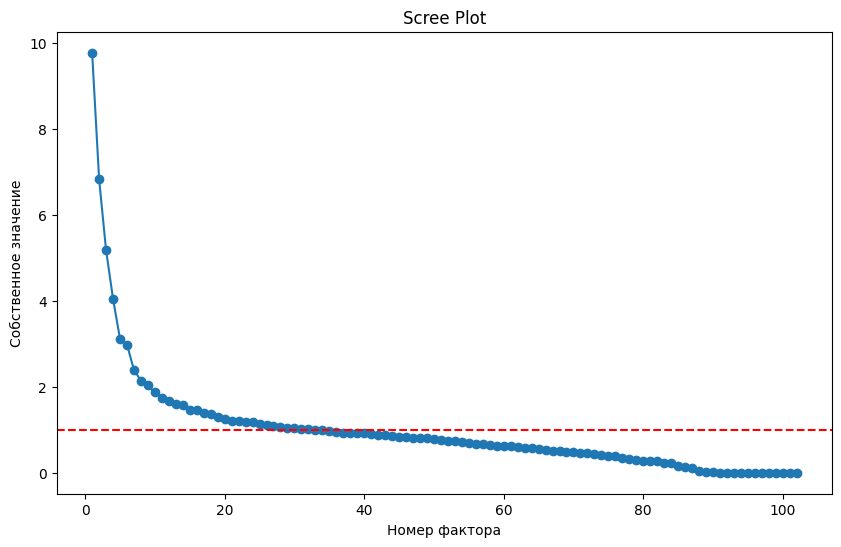

    Factor  Eigenvalue  % of Variance  Cumulative %
0        1    9.777578       9.585861      9.585861
1        2    6.835243       6.701219     16.287080
2        3    5.177124       5.075612     21.362692
3        4    4.045765       3.966436     25.329128
4        5    3.111060       3.050058     28.379186
5        6    2.980768       2.922322     31.301508
6        7    2.391973       2.345071     33.646579
7        8    2.141103       2.099120     35.745700
8        9    2.031118       1.991292     37.736992
9       10    1.868161       1.831530     39.568522
10      11    1.740510       1.706382     41.274904


In [207]:
# График осыпи
plt.figure(figsize=(10, 6))
plt.scatter(range(1, len(ev)+1), ev)
plt.plot(range(1, len(ev)+1), ev)
plt.title('Scree Plot')
plt.xlabel('Номер фактора')
plt.ylabel('Собственное значение')
plt.axhline(y=1, color='r', linestyle='--')
plt.show()

# Таблица собственных значений и доли дисперсии
eigenvalues_table = pd.DataFrame({
    'Factor': range(1, len(ev)+1),
    'Eigenvalue': ev,
    '% of Variance': (ev / ev.sum()) * 100,
    'Cumulative %': (ev.cumsum() / ev.sum()) * 100
})

print(eigenvalues_table.head(11))  

In [208]:
# Инициализация модели с 9 факторами
fa_promax = FactorAnalyzer(n_factors=9, rotation='promax', method='principal')
fa_promax.fit(analysis_df[feature_columns_new])

# Факторные нагрузки
loadings = pd.DataFrame(
    fa_promax.loadings_,
    columns=[f'Factor {i+1}' for i in range(9)],
    index=feature_columns_new
)

# Сохраняем нагрузки в CSV
loadings.to_csv('factor_loadings.csv')

In [209]:
# Выводим значимые нагрузки 
significant_loadings = loadings.applymap(lambda x: x if abs(x) > 0.3 else None)
# significant_loadings.dropna(how='all')

for factor in significant_loadings.columns:
    print(f'Нагрузки для {factor}:')

    # Берём нагрузки для текущего фактора и исключаем NaN
    for feature, loading in significant_loadings[factor].items():
        if not pd.isna(loading):
            print(f'  - {feature}: {loading}')
    print()

Нагрузки для Factor 1:
  - place_adverbials_abs: 0.31626046717800765
  - time_adverbials_abs: 0.3467333320670181
  - propr_name_abs: -0.43992463288143574
  - praedicative_abs: 0.4378603602142923
  - subordinate_clauses_abs: 0.5013307885477047
  - type-token ratio_abs: -0.36762153640250106
  - fut_tense_abs: 0.35462233613029903
  - infinitives_abs: 0.3053754793816543
  - middle_voice_abs: 0.5958379875849971
  - neg_polarity_abs: 0.41258127343138273
  - third_pers_verb_sing_abs: 0.8818619272236884
  - third_pers_verb_plur_abs: 0.8818619272236884
  - intr_verb_abs: 0.5678924248166902
  - adv_degree_pos_abs: 0.5690092005764137

Нагрузки для Factor 2:
  - verb_coordination_abs: 0.520813957721547
  - perfect_aspect_abs: 0.32991524713315196
  - imperfect_aspect_abs: 0.6960119802102203
  - past_tense_abs: 0.4156797146413092
  - present_tense_abs: 0.4373320517985503
  - ind_mood_verb_abs: 0.8871212083898116
  - finite_verbs_abs: 0.8695567832596719
  - active_voice_abs: 0.8854718618703817
  - fi

/tmp/ipykernel_31/3491099970.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  significant_loadings = loadings.applymap(lambda x: x if abs(x) > 0.3 else None)


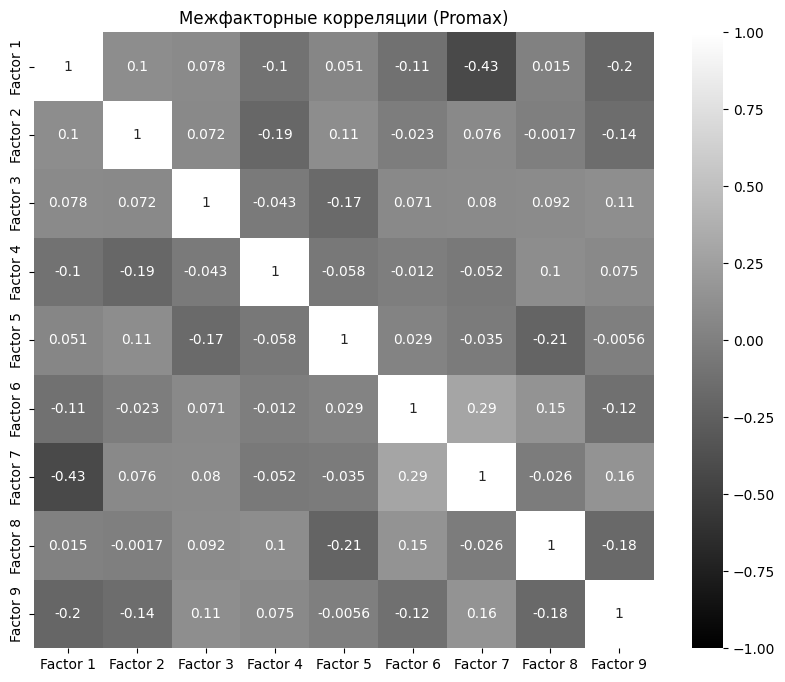

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt

# Получаем факторные корреляции
factor_corr = pd.DataFrame(
    fa_promax.phi_,
    columns=[f'Factor {i+1}' for i in range(9)],
    index=[f'Factor {i+1}' for i in range(9)]
)

# Визуализация
plt.figure(figsize=(10, 8))
sns.heatmap(factor_corr, annot=True, cmap='gray', vmin=-1, vmax=1)
plt.title('Межфакторные корреляции (Promax)')
plt.show()

In [211]:
# Порог значимости для включения признаков
threshold = 0.30

# Находим абсолютные нагрузки
loadings_abs = loadings.abs()

# Индексы факторов с максимальной нагрузкой для каждого признака
max_index = loadings_abs.idxmax(axis=1)

# Создаем словарь для хранения признаков по факторам
factor_dict = {}

# Заполняем словарь, выбирая только те нагрузки, которые выше порога
for feature in loadings.index:
    factor = max_index[feature]
    max_loading = loadings_abs.loc[feature, factor]

    if max_loading > threshold:
        if factor not in factor_dict:
            factor_dict[factor] = []
        factor_dict[factor].append([feature, float(loadings.loc[feature, factor])])

factor_dict


{'Factor 7': [['first_person_pronouns_sing_abs', -0.33396728334696724],
  ['second_person_pronouns_plur_abs', 0.43062632802701],
  ['noun_abstr_index_abs', -0.48496907538421713],
  ['noun_coordination_abs', 0.46480882127112166],
  ['perfect_aspect_abs', -0.6403202807931385],
  ['past_tense_abs', -0.8624389755033728],
  ['present_tense_abs', 0.800817520375402],
  ['first_pers_verb_sing_abs', 0.5402720730023141],
  ['first_pers_verb_plur_abs', 0.5402720730023141],
  ['noun_neut_abs', 0.4191183024685146],
  ['noun_case_gen_abs', 0.47167249634725666],
  ['noun_case_acc_abs', -0.4874378625460726],
  ['adj_case_gen_abs', 0.339032457318432]],
 'Factor 8': [['second_person_pronouns_sing_abs', -0.43960236204406394],
  ['word length_abs', 0.6074363299652032],
  ['flesch_kincaid_index_abs', -0.5323873527750929],
  ['participles_abs', 0.5556664459781004],
  ['passive_voice_abs', 0.5627815618758656],
  ['plur_noun_abs', 0.4233598644313604],
  ['plur_adj_abs', 0.35443831337650633]],
 'Factor 3': [['

# Factor scores

In [212]:
nan_cols = df_balanced.columns[df_balanced.isnull().any()]
print("Столбцы, содержащие NaN:", nan_cols)



Столбцы, содержащие NaN: Index(['noun_abstr_index_abs', 'adj_abstr_index_abs'], dtype='object')


In [213]:
for col in nan_cols:
    df_balanced[col] = df_balanced[col].fillna(0).astype('float64')

nan_cols = df_balanced.columns[df_balanced.isnull().any()]
print("Столбцы, содержащие NaN:", nan_cols)

df_with_nan = df_balanced[nan_cols]

# Создаем булеву маску, где True соответствует строкам, содержащим хотя бы один NaN
rows_with_nan = df_with_nan.isnull().any(axis=1)

# Считаем количество строк, содержащих хотя бы один NaN
print(rows_with_nan.sum())


Столбцы, содержащие NaN: Index([], dtype='object')
0


In [219]:
standardized_feature_matrix  = df_balanced.copy()
standardized_feature_matrix

,text,year,decade,first_person_pronouns_sing_abs,first_person_pronouns_plur_abs,second_person_pronouns_sing_abs,second_person_pronouns_plur_abs,third_person_pronouns_masc_abs,third_person_pronouns_fem_abs,third_person_pronouns_neut_abs,...,full_adj_abs,shrot_adj_abs,adv_degree_pos_abs,adv_degree_comp_abs,quant_num_abs,anum_num_abs,dim_nouns_abs,dim_adj_abs,text_length,type
0,{Поздравляю <u>[нрзб]</u>}{Поздравляю вас доро...,1906,1900,2.564,0.000,0.000,2.564,0.000,0.000,0.000,...,10.256,2.564,5.128,0.000,0.000,0.00,5.128,0.000,38,postcard
1,1903 [нрзб] Многоуважаемая и дорогая Марья Ива...,1903,1900,0.000,0.000,0.000,6.061,0.000,0.000,0.000,...,21.212,0.000,3.030,0.000,3.030,0.00,3.030,0.000,32,postcard
2,Милая матушка прошу пожалуйста прислать мне жа...,1909,1900,3.448,0.000,0.000,0.000,0.000,3.448,0.000,...,6.897,0.000,6.897,0.000,0.000,0.00,6.897,0.000,28,postcard
3,Христос Воскресе! Дорогая Ниночка Поздравляю ...,1909,1900,3.704,0.000,3.704,0.000,0.000,0.000,0.000,...,14.815,0.000,3.704,0.000,0.000,0.00,0.000,0.000,26,postcard
4,{[?Киту] вы такая [?не] озабоченная и суетлива...,1903,1900,0.714,0.000,0.714,0.714,1.429,0.714,0.714,...,17.857,2.857,12.143,0.714,0.000,0.00,1.429,0.714,139,postcard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4439,Доклады почти все — полный бред. Не выдержу —...,2003,2000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,21.429,0.000,7.143,0.000,0.000,0.00,7.143,0.000,13,diary
4440,И о Тютчеве хочется — и мог бы — написать. Хв...,2000,2000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,9.091,0.000,0.000,0.000,6.818,0.00,6.818,0.000,43,diary
4441,"Вчера звонил, прочитав роман, К.Я. Ваншенкин;...",2002,2000,5.116,0.465,0.000,0.930,0.465,0.000,0.000,...,16.744,1.860,4.186,0.465,0.465,0.93,6.512,0.930,214,diary
4442,Именно это говорят про историю с Касьяновым п...,2005,2000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,6.667,0.000,0.000,0.000,0.000,0.00,0.000,0.000,14,diary


In [220]:
standardized_feature_matrix  = standardized_feature_matrix.drop(['text', 'year', 'decade', 'type', 'text_length'], axis=1)
standardized_feature_matrix

,first_person_pronouns_sing_abs,first_person_pronouns_plur_abs,second_person_pronouns_sing_abs,second_person_pronouns_plur_abs,third_person_pronouns_masc_abs,third_person_pronouns_fem_abs,third_person_pronouns_neut_abs,third_person_pronouns_plur_abs,demonstrative_pronouns_abs,prepositions_abs,...,adj_degree_comp_abs,adj_degree_super_abs,full_adj_abs,shrot_adj_abs,adv_degree_pos_abs,adv_degree_comp_abs,quant_num_abs,anum_num_abs,dim_nouns_abs,dim_adj_abs
0,2.564,0.000,0.000,2.564,0.000,0.000,0.000,0.000,0.000,5.128,...,0.0,0.000,10.256,2.564,5.128,0.000,0.000,0.00,5.128,0.000
1,0.000,0.000,0.000,6.061,0.000,0.000,0.000,0.000,0.000,9.091,...,0.0,3.030,21.212,0.000,3.030,0.000,3.030,0.00,3.030,0.000
2,3.448,0.000,0.000,0.000,0.000,3.448,0.000,0.000,0.000,13.793,...,0.0,0.000,6.897,0.000,6.897,0.000,0.000,0.00,6.897,0.000
3,3.704,0.000,3.704,0.000,0.000,0.000,0.000,0.000,0.000,3.704,...,0.0,3.704,14.815,0.000,3.704,0.000,0.000,0.00,0.000,0.000
4,0.714,0.000,0.714,0.714,1.429,0.714,0.714,1.429,2.143,9.286,...,0.0,0.000,17.857,2.857,12.143,0.714,0.000,0.00,1.429,0.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4439,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.000,21.429,0.000,7.143,0.000,0.000,0.00,7.143,0.000
4440,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,9.091,...,0.0,0.000,9.091,0.000,0.000,0.000,6.818,0.00,6.818,0.000
4441,5.116,0.465,0.000,0.930,0.465,0.000,0.000,0.000,1.395,7.442,...,0.0,0.000,16.744,1.860,4.186,0.465,0.465,0.93,6.512,0.930
4442,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,26.667,...,0.0,0.000,6.667,0.000,0.000,0.000,0.000,0.00,0.000,0.000


In [32]:
# descriptive_stats = pd.read_csv('/kaggle/input/pt-descrip-stats/descriptive_stats_pt.csv', index_col='Unnamed: 0')

In [221]:
for column in standardized_feature_matrix.columns:
    mean = descriptive_stats.loc[column, 'mean']
    std = descriptive_stats.loc[column, 'std']

    standardized_feature_matrix[column] = (standardized_feature_matrix[column] - mean) / std
standardized_feature_matrix

,first_person_pronouns_sing_abs,first_person_pronouns_plur_abs,second_person_pronouns_sing_abs,second_person_pronouns_plur_abs,third_person_pronouns_masc_abs,third_person_pronouns_fem_abs,third_person_pronouns_neut_abs,third_person_pronouns_plur_abs,demonstrative_pronouns_abs,prepositions_abs,...,adj_degree_comp_abs,adj_degree_super_abs,full_adj_abs,shrot_adj_abs,adv_degree_pos_abs,adv_degree_comp_abs,quant_num_abs,anum_num_abs,dim_nouns_abs,dim_adj_abs
0,0.550071,-0.435500,-0.400132,0.483181,-0.459563,-0.317178,-0.105324,-0.337792,-0.536496,-1.091325,...,-0.218468,-0.261293,-0.684766,1.003432,-0.092438,-0.325110,-0.620772,-0.299761,-0.015362,-0.758784
1,-0.667666,-0.435500,-0.400132,1.835322,-0.459563,-0.317178,-0.105324,-0.337792,-0.536496,-0.181171,...,-0.218468,3.356433,0.933533,-0.576499,-0.544907,-0.325110,0.037292,-0.299761,-0.497429,-0.758784
2,0.969915,-0.435500,-0.400132,-0.508208,-0.459563,3.741289,-0.105324,-0.337792,-0.536496,0.898704,...,-0.218468,-0.261293,-1.180920,-0.576499,0.289078,-0.325110,-0.620772,-0.299761,0.391109,-0.758784
3,1.091499,-0.435500,1.357687,-0.508208,-0.459563,-0.317178,-0.105324,-0.337792,-0.536496,-1.418365,...,-0.218468,4.161168,-0.011361,-0.576499,-0.399548,-0.325110,-0.620772,-0.299761,-1.193646,-0.758784
4,-0.328562,-0.435500,-0.061287,-0.232135,0.685413,0.523236,5.091620,1.797714,1.462909,-0.136387,...,-0.218468,-0.261293,0.437969,1.183978,1.420468,0.793451,-0.620772,-0.299761,-0.865298,-0.431307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4439,-0.667666,-0.435500,-0.400132,-0.508208,-0.459563,-0.317178,-0.105324,-0.337792,-0.536496,-2.269037,...,-0.218468,-0.261293,0.965586,-0.576499,0.342132,-0.325110,-0.620772,-0.299761,0.447634,-0.758784
4440,-0.667666,-0.435500,-0.400132,-0.508208,-0.459563,-0.317178,-0.105324,-0.337792,-0.536496,-0.181171,...,-0.218468,-0.261293,-0.856847,-0.576499,-1.198379,-0.325110,0.859981,-0.299761,0.372957,-0.758784
4441,1.762109,-0.043379,-0.400132,-0.148617,-0.086985,-0.317178,-0.105324,-0.337792,0.765030,-0.559885,...,-0.218468,-0.261293,0.273569,0.569629,-0.295596,0.403365,-0.519782,0.644456,0.302646,-0.332238
4442,-0.667666,-0.435500,-0.400132,-0.508208,-0.459563,-0.317178,-0.105324,-0.337792,-0.536496,3.855384,...,-0.218468,-0.261293,-1.214893,-0.576499,-1.198379,-0.325110,-0.620772,-0.299761,-1.193646,-0.758784


In [222]:
feature_columns_new = [col for col in standardized_feature_matrix.columns]
len(feature_columns_new)

103

In [223]:
# Среднее после стандартизации должно быть ~0
print(standardized_feature_matrix[feature_columns_new].mean().round(2))  

# Стандартное отклонение должно быть ~1
print(standardized_feature_matrix[feature_columns_new].std().round(2))   

first_person_pronouns_sing_abs     0.0
first_person_pronouns_plur_abs     0.0
second_person_pronouns_sing_abs   -0.0
second_person_pronouns_plur_abs    0.0
third_person_pronouns_masc_abs     0.0
                                  ... 
adv_degree_comp_abs                0.0
quant_num_abs                      0.0
anum_num_abs                       0.0
dim_nouns_abs                     -0.0
dim_adj_abs                        0.0
Length: 103, dtype: float64
first_person_pronouns_sing_abs     1.0
first_person_pronouns_plur_abs     1.0
second_person_pronouns_sing_abs    1.0
second_person_pronouns_plur_abs    1.0
third_person_pronouns_masc_abs     1.0
                                  ... 
adv_degree_comp_abs                1.0
quant_num_abs                      1.0
anum_num_abs                       1.0
dim_nouns_abs                      1.0
dim_adj_abs                        1.0
Length: 103, dtype: float64


In [224]:
# 1. Создаем DataFrame factor_scores с текстами и декадами
factor_scores = df_balanced[['text', 'decade', 'type']].copy()

# 2. Связываем standardized_feature_matrix с factor_scores по индексам
standardized_features = standardized_feature_matrix.copy()
standardized_features.index = factor_scores.index

In [225]:
# 3. Функция для расчета факторной оценки
def calculate_factor_score(row, factor_features):
    score = 0
    for feature, loading in factor_features:
        # Получаем стандартизированное значение признака
        value = row[feature]
        # Учитываем знак нагрузки: + если loading > 0, - если loading < 0
        score += value * (1 if loading > 0 else -1)
    return score

In [226]:
# 4. Для каждого фактора из factor_dict вычисляем оценку
for factor, features in factor_dict.items():
    # Признаки и их нагрузки для текущего фактора
    factor_features = [(feat[0], feat[1]) for feat in features]

    # Проверяем наличие признаков в standardized_features
    missing = [feat[0] for feat in features if feat[0] not in standardized_features.columns]
    if missing:
        print(f"Предупреждение: Признаки {missing} отсутствуют в standardized_feature_matrix.")
        continue

    # Рассчитываем факторную оценку
    factor_scores[factor] = standardized_features.apply(
        lambda row: calculate_factor_score(row, factor_features), axis=1
    )

factor_scores.head()

,text,decade,type,Factor 7,Factor 8,Factor 3,Factor 9,Factor 1,Factor 4,Factor 6,Factor 2,Factor 5
0,{Поздравляю <u>[нрзб]</u>}{Поздравляю вас доро...,1900,postcard,0.711619,3.328583,1.792193,-2.216892,1.200292,-2.251961,-4.426222,10.971389,10.494877
1,1903 [нрзб] Многоуважаемая и дорогая Марья Ива...,1900,postcard,6.741321,-3.114617,-3.032880,-3.419249,-7.111716,-3.728438,2.709073,-0.414527,-1.738401
2,Милая матушка прошу пожалуйста прислать мне жа...,1900,postcard,1.570666,1.121453,0.101593,2.532480,1.092880,0.902620,-5.172622,-0.494542,-1.738401
3,Христос Воскресе! Дорогая Ниночка Поздравляю ...,1900,postcard,1.784405,-2.911030,-6.539669,1.315474,1.562521,-1.368469,-1.507172,5.336410,-1.738401
4,{[?Киту] вы такая [?не] озабоченная и суетлива...,1900,postcard,-0.279477,-4.856575,4.542535,-3.927463,1.165013,-3.186388,0.408441,-3.612380,-0.035094


In [274]:
factor_scores.to_csv('factor_scores.csv')

# Text by factors

In [2]:
import pandas as pd
factor_scores = pd.read_csv('/kaggle/input/normal-data/factor_scores.csv', index_col = 'Unnamed: 0')

In [2]:
factor_scores

,text,decade,type,Factor 7,Factor 8,Factor 3,Factor 9,Factor 1,Factor 4,Factor 6,Factor 2,Factor 5,decade_class
0,{Поздравляю <u>[нрзб]</u>}{Поздравляю вас доро...,1900,postcard,0.711619,3.328583,1.792193,-2.216892,1.200292,-2.251961,-4.426222,10.971389,10.494877,1900-1960
1,1903 [нрзб] Многоуважаемая и дорогая Марья Ива...,1900,postcard,6.741321,-3.114617,-3.032880,-3.419249,-7.111716,-3.728438,2.709073,-0.414527,-1.738401,1900-1960
2,Милая матушка прошу пожалуйста прислать мне жа...,1900,postcard,1.570666,1.121453,0.101593,2.532480,1.092880,0.902620,-5.172622,-0.494542,-1.738401,1900-1960
3,Христос Воскресе! Дорогая Ниночка Поздравляю ...,1900,postcard,1.784405,-2.911030,-6.539669,1.315474,1.562521,-1.368469,-1.507172,5.336410,-1.738401,1900-1960
4,{[?Киту] вы такая [?не] озабоченная и суетлива...,1900,postcard,-0.279477,-4.856575,4.542535,-3.927463,1.165013,-3.186388,0.408441,-3.612380,-0.035094,1900-1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4439,Доклады почти все — полный бред. Не выдержу —...,2000,diary,-0.058127,-2.343336,-4.699669,3.399045,8.627904,1.016332,9.102443,1.022039,-1.738401,1960-2020
4440,И о Тютчеве хочется — и мог бы — написать. Хв...,2000,diary,5.346799,-2.915649,-1.483916,-1.007470,5.121346,5.128969,-6.084011,-0.259949,0.789807,1960-2020
4441,"Вчера звонил, прочитав роман, К.Я. Ваншенкин;...",2000,diary,-5.856687,0.737630,-0.131149,-1.432987,4.987089,-0.746879,-0.916749,3.204848,-1.738401,1960-2020
4442,Именно это говорят про историю с Касьяновым п...,2000,diary,0.162414,-3.433795,0.117003,-0.351270,-2.815481,-7.204313,-9.666581,-4.299989,-1.738401,1960-2020


In [285]:
# Сортируем по убыванию Factor 1 и берем первые 10 строк
top_10 = factor_scores.sort_values(by='Factor 1', ascending=False)[:11]

# Выводим тексты и значения, включая тип текста
print("Тексты с наибольшими значениями Factor 1:")
for index, row in top_10.iterrows():
    print(f"Type: {row['type']}, Text: {row['text']}}}")

# diary_count = top_10[top_10['type'] == 'diary']['type'].count()
# postcard_count = top_10[top_10['type'] == 'postcard']['type'].count()

# print(f"Количество дневников в топ-100: {diary_count}")
# print(f"Количество открыток в топ-100: {postcard_count}")

Тексты с наибольшими значениями Factor 1:
Type: diary, Text:  Подготовил форсирование Днестра, а разведчики сбились с дороги, заблудились. Время двигаться, а их нет…<com id="14809588071449"/> Не везет сегодня. Форсирование пришлось отставить. }
Type: diary, Text:  […]     Вчера и сегодня пробивался к концовке «Друга детства». Концовки еще нет, но есть строфы и строки, что, должно быть, останутся. Завтра, может быть, поеду с Иваном Сергеевичем в Карачарово дня на 2 — 3. }
Type: diary, Text:  Начинаю привязываться к школе. И уезжать-то, пожалуй, будет жаль. А уезжать, видимо, предстоит скоро. Госпиталь, вероятно, недолго проживет здесь. Если фронт отодвинется, то нецелесообразно будет ему оставаться в таком глубоком тылу.     Еще неделю назад я писала — скорей бы домой, а теперь... Пожалуй, с удовольствием осталась бы до лета. }
Type: diary, Text:  ... Я еще болен... Как хочется выздороветь! ... }
Type: diary, Text:  [...] Когда позволяю себе решить, что ничего не выходит, не выйдет, неч

In [281]:
diary_count = top_10[top_10['type'] == 'diary']['type'].count()
postcard_count = top_10[top_10['type'] == 'postcard']['type'].count()

print(f"Количество дневников в топ-100: {diary_count}")
print(f"Количество открыток в топ-100: {postcard_count}")

Количество дневников в топ-100: 67
Количество открыток в топ-100: 33


In [288]:
# Сортируем по возрастанию Factor 1 и берем первые 10 строк
bottom_10 = factor_scores.sort_values(by='Factor 1', ascending=True)[:20]

# Выводим тексты и значения
# Выводим тексты и значения, включая тип текста
print("Тексты с наименьшими значениями Factor 1:")
for index, row in bottom_10.iterrows():
    print(f"Type: {row['type']}, Text: {row['text']}}}")

# diary_count = bottom_10[bottom_10['type'] == 'diary']['type'].count()
# postcard_count = bottom_10[bottom_10['type'] == 'postcard']['type'].count()

# print(f"Количество дневников в топ-100: {diary_count}")
# print(f"Количество открыток в топ-100: {postcard_count}")

Тексты с наименьшими значениями Factor 1:
Type: postcard, Text: Христос Воскресе!! Володя и Марихен.}
Type: postcard, Text: {Христос Воскресе! Володя} {<u>здесь</u>}}
Type: postcard, Text: Христос Воскресе! А. Николаев}
Type: postcard, Text: Милой Палюши от любящеи [любящей] тебя Лели Гоеляевой Привет всем Досвидания [до свидяния]}
Type: diary, Text:  Ч. 20-7. Я починял сак старый. Митрий пахал паренину. Марья гладила лен. Хоз[яйка] убор[щица]. }
Type: postcard, Text: Уважаемые: Инна, Володя Витя, Наташа, Женя поздравляем всех вас с Новым годом и Рождеством, здоровья вам и исполнения всех желаний в 2002 г. Саша, Лида, Коля, Ирина}
Type: postcard, Text: Здравствуйте Валя Сергей Виктар [^Виктор] Татьяна Бабуля Машинка [^Машенька] Лёша Николай Люда Андрей Нина Оксанк[?а] и я поздравляем вас с новым год[ом] 1990 жалаем[^желаем] здор[овья] успеха щастия[^счастья] Прохоравы[^Прохоровы] буддте[^будьте] здоровое[^здоровы]}
Type: postcard, Text: Тамара и Гена!!! С Праздником Октября Вас мы позд

In [283]:
diary_count = bottom_10[bottom_10['type'] == 'diary']['type'].count()
postcard_count = bottom_10[bottom_10['type'] == 'postcard']['type'].count()

print(f"Количество дневников в топ-100: {diary_count}")
print(f"Количество открыток в топ-100: {postcard_count}")

Количество дневников в топ-100: 13
Количество открыток в топ-100: 87


In [7]:
# Сортируем по убыванию Factor 1 и берем первые 10 строк
top_10 = factor_scores.sort_values(by='Factor 2', ascending=False)[:10]

# Выводим тексты и значения, включая тип текста
print("Тексты с наибольшими значениями Factor 2:")
for index, row in top_10.iterrows():
    print(f"Type: {row['type']}, Text: {row['text']}}}")

# diary_count = top_10[top_10['type'] == 'diary']['type'].count()
# postcard_count = top_10[top_10['type'] == 'postcard']['type'].count()

# print(f"Количество дневников в топ-100: {diary_count}")
# print(f"Количество открыток в топ-100: {postcard_count}")

Тексты с наибольшими значениями Factor 2:
Type: diary, Text:  Все пишу, пишу и переписываю прошлое, переношусь так живо в воспоминанья. И радуешься тому, что было, и плачешь... Все думаю и мучаюсь об Илье. Что-то он предпримет! }
Type: diary, Text:  Мы продвигаемся вперед. Целый день едем, чувствую себя устало. }
Type: diary, Text:  Папе сделали рентген, обнаружили 6 осколков в ноге. Собираются оперировать. }
Type: diary, Text:  Начали читать «Идиота» Достоевского. }
Type: diary, Text:  П. 13-31. Был дома, делал ушат. Митька возил камни на поли<com id="150471657414156"/>. Марья молотила рож[ь], хозяйка работала кое-что. }
Type: diary, Text:  С. 11-28. Болел, Митрий навос мечет, Марья молотила, хозяй[ка] уборщи[ца]. }
Type: diary, Text:  П. 7-25. Был на озери, на Тютезери, сачил, достал рыбы 2 варки. Митька косил, бабы жали. }
Type: diary, Text:  Не спала, а когда засыпала, все видела во сне покойного мужа, но не радостного, а всегда или печального, или недоброго. Утро очень тосковала, 

In [5]:
diary_count = top_10[top_10['type'] == 'diary']['type'].count()
postcard_count = top_10[top_10['type'] == 'postcard']['type'].count()

print(f"Количество дневников в топ-100: {diary_count}")
print(f"Количество открыток в топ-100: {postcard_count}")

Количество дневников в топ-100: 56
Количество открыток в топ-100: 44


In [6]:
# Сортируем по возрастанию Factor 1 и берем первые 10 строк
bottom_10 = factor_scores.sort_values(by='Factor 2', ascending=True)[:20]

# Выводим тексты и значения
# Выводим тексты и значения, включая тип текста
print("Тексты с наименьшими значениями Factor 2:")
for index, row in bottom_10.iterrows():
    print(f"Type: {row['type']}, Text: {row['text']}}}")

Тексты с наименьшими значениями Factor 2:
Type: diary, Text:  П&lt;ахра&gt;. [...]<com id="1481290933141175"/> }
Type: postcard, Text: {На память Мане от Риты Лимановой 7 X 1926 года.}}
Type: postcard, Text: Привет с Москвы всем нашим робочим[*родочим][^рабочим] ж.д. Валя}
Type: postcard, Text: Нина! Добрый день и Новогодние пожелания. Целую тебя, Эдика и Эммочку. Твой Петр. 21.12.1944 г. г. Луга}
Type: postcard, Text: Милой сестренке! Память о Констанце от брата.  21.7.45 Анатоль.}
Type: postcard, Text: На долгую память Вале от друга Фимы}
Type: diary, Text: Дивный Альфред [«Травиата»]. Успех колоссальный — совсем старый, прежний Фигнер.}
Type: postcard, Text: Софийка! От всей души шлю тебе свое поздравление и пожелания счастья в Новом 1965ом году. <u> От всей души! </u> Владимир.}
Type: postcard, Text: Вот тебе, наш элефантик. Чёрт-те-что и сбоку бантик.}
Type: diary, Text:  Цветут фиолетовые багульник и рододендрон, сакура, которая здесь гигантских размеров — красота неописуемая. }


In [41]:
# dif = feature_matrix_pr[feature_matrix_pr['text']==text]['avg_vp_length_abs'] / (feature_matrix_pr[feature_matrix_pr['text']==text]['text_length'] + 1)
# (dif) * 100

12471    0.124555
dtype: float64

In [19]:
# Сортируем по убыванию Factor 1 и берем первые 10 строк
top_10 = factor_scores.sort_values(by='Factor 3', ascending=False)[:100]

# Выводим тексты и значения, включая тип текста
print("Тексты с наибольшими значениями Factor 3:")
for index, row in top_10.iterrows():
    if row['type']=='postcard':
        print(f"Type: {row['type']}, Text: {row['text']}}}")



Тексты с наибольшими значениями Factor 3:
Type: postcard, Text: Поздравляю милую славную Ольгу Александровну с днем ангела желаю здоровья и свякого [^ всякого] благополучия и также поздравляю всех с дорогой именинницей как бы мне хотелос [^ хотелось] поздравить вас дорогая лично но вот ни как [^ никак] не могу собраться приехать к вас мущины [^ мужчины] так же шлют поздравл[ения] и лучшие пожелания Леничка писал в поледнем [^ последнем] письме чтобы как я буду писать вам то передать от него привет втор[?ым] [нрзб] он на пасху послал вам письмо что то [^ что-то] последнее время стал страшно скучать [* ты] [* от] [? всех] [нрзб] но здоровье мое не важно [^ неважно] {Ларик [* скулит] [* скучает] очень устает {и} много [нрзб] К.А [? постарел] работая вообще очень скучно целую вас и всех. Как Игорь и [* Юра] [* Юрий] [* Юля] [нрзб] [* Ваш] [* Ваша] <подпись>}}
Type: postcard, Text: {Московское отделение Аптека [нрзб] Центральный Аптекарский Склад} <s>[нрзб]</s> Санаторий в г. Ялте Сообщение

In [6]:
diary_count = top_10[top_10['type'] == 'diary']['type'].count()
postcard_count = top_10[top_10['type'] == 'postcard']['type'].count()

print(f"Количество дневников в топ-100: {diary_count}")
print(f"Количество открыток в топ-100: {postcard_count}")

Количество дневников в топ-100: 75
Количество открыток в топ-100: 25


In [5]:
# Сортируем по возрастанию Factor 1 и берем первые 10 строк
bottom_10 = factor_scores.sort_values(by='Factor 3', ascending=True)[:10]

# Выводим тексты и значения
# Выводим тексты и значения, включая тип текста
print("Тексты с наименьшими значениями Factor 3:")
for index, row in bottom_10.iterrows():
    print(f"Type: {row['type']}, Text: {row['text']}}}")

Тексты с наименьшими значениями Factor 3:
Type: diary, Text:  Четверг. День теплый. }
Type: diary, Text:  Понедельник. Фомина. День был дома. Погода была хорошая. }
Type: diary, Text:  Первый полный день занятий. }
Type: postcard, Text: Христос Воскресе! А. Николаев}
Type: postcard, Text: Христос Воскрес! Нюрка Троицкая}
Type: diary, Text:  Среда. 15 Февраль. Четверг. 16. Пятница. 17. Суббота. все дни были немного потеплей. }
Type: diary, Text:  ... Я еще болен... Как хочется выздороветь! ... }
Type: diary, Text:  Всю ночь шел сильный дождь. Все обледенело. }
Type: postcard, Text: Христос Воскресе! Дорогая Вера  13/IV 08}
Type: diary, Text:  (6 января 1916 г.). Йод 8. }


In [12]:
diary_count = bottom_10[bottom_10['type'] == 'diary']['type'].count()
postcard_count = bottom_10[bottom_10['type'] == 'postcard']['type'].count()

print(f"Количество дневников в топ-100: {diary_count}")
print(f"Количество открыток в топ-100: {postcard_count}")

Количество дневников в топ-100: 50
Количество открыток в топ-100: 50


In [5]:
# Сортируем по убыванию Factor 1 и берем первые 10 строк
top_10 = factor_scores.sort_values(by='Factor 4', ascending=False)[:100]

# Выводим тексты и значения, включая тип текста
print("Тексты с наибольшими значениями Factor 4:")
for index, row in top_10.iterrows():
    if row['type'] == 'postcard':
        print(f"Type: {row['type']}, Text: {row['text']}}}")



Тексты с наибольшими значениями Factor 4:
Type: postcard, Text: Вот тебе, наш элефантик. Чёрт-те-что и сбоку бантик.}
Type: postcard, Text: Дорогая сестра, шлю привет [нрзб] бывали пути [нрзб] день [нрзб] Привет всем Твой брат Гри[ша] 8/III 23 г. [нрзб] {для Коли}}
Type: postcard, Text: Звени, звени, гитара, звени не умолкай Люби, люби подруга Люби не забывай}
Type: postcard, Text: Дорогие папа, мама, бабушка и дедушка! Поздравляем с Новым 1974 годом. Будьте здоровы, здоровы и здоровы. Внуки, дети}
Type: postcard, Text: Милая дорогая, Лидия Степановна! Поздравляю Вас с днем Ангела. Желаю Вам, чтобы Вы всегда были счастливы, здоровы и веселы. Пока всего хорошего, Целую Вас кре-кре-кре-п-п-пко при-кре-кре-пко Любящая Вас вечно Ваша Лера 5 IV 1929}
Type: postcard, Text: {<u>р-физ.</u>} {<s>На физ. ф-нте лет. Секретарь [нрзб]</s>} {<s> мех-мат </s>} Жанночка! Поздравляю с праздником. Желаю весело его провести. Пиши Жанна, как живешь. Буду ждать письма. Пока до свидания. Целую <подпись>. {5

In [9]:
# Сортируем по возрастанию Factor 1 и берем первые 10 строк
bottom_10 = factor_scores.sort_values(by='Factor 4', ascending=True)[:50]

# Выводим тексты и значения
# Выводим тексты и значения, включая тип текста
print("Тексты с наименьшими значениями Factor 4:")
for index, row in bottom_10.iterrows():
    print(f"Type: {row['type']}, Text: {row['text']}}}")

Тексты с наименьшими значениями Factor 4:
Type: diary, Text:  ... Я еще болен... Как хочется выздороветь! ... }
Type: diary, Text:  Приехал в Киев. }
Type: postcard, Text: {Целуем крепко и желаем всего лучшего [?Эмме Роме и Гедв.] Эдуард}}
Type: diary, Text:  Приехал Н. Н. Гусев. }
Type: diary, Text:  Вчера приехали Сережа и Буланже. }
Type: diary, Text:  Вчера прилетел в Кёльн. &lt;…&gt; }
Type: diary, Text:  Читали вслух Л. Н. и Михаил Сергеевич о Будде. }
Type: postcard, Text: {Ревель, Петроград, Москва, Орел да Харьков!}}
Type: postcard, Text: Ваня! Поздравляю с Ангелом и желаю всего всего хорошего и главное быть здоровым. Остаюсь Маня}
Type: diary, Text:  9-го и 10-го был в Чегеме. Говорит, отдыхай, хорошо высыпайся. }
Type: postcard, Text: B.C. {Ирине Анатольевне Смирновой}}
Type: diary, Text:  П&lt;ахра&gt;. [...]<com id="1481290933141175"/> }
Type: postcard, Text: Христос Воскрес, с Праздником. Л.В.Су[нрзб].}
Type: diary, Text:  Вторник. Владыка уехал в Москву. }
Type: postcard

In [8]:
# Сортируем по убыванию Factor 1 и берем первые 10 строк
top_10 = factor_scores.sort_values(by='Factor 5', ascending=False)[:500]

# Выводим тексты и значения, включая тип текста
print("Тексты с наибольшими значениями Factor 5:")
for index, row in top_10.iterrows():
    if row['type']=='diary':
        print(f"Type: {row['type']}, Text: {row['text']}}}")



Тексты с наибольшими значениями Factor 5:
Type: diary, Text:  9-го и 10-го был в Чегеме. Говорит, отдыхай, хорошо высыпайся. }
Type: diary, Text:  Дал домой телеграмму. К вечеру 1 кр. 35! Больше одного дня просуществовать трудно. }
Type: diary, Text:  Она, эта земля, ревнует к тем землям, где люди лепятся густо, где освоена каждая пядь, где понастроено всего — стена к стене — понасажено садов и т.д. А чем же я нехороша? Пустынна? Населите меня. Неустроенна? — Устройте, обживите. Не уносите обо мне лишь эту тягостную память.     Я должен вставать вместе с теми, кто заступает в утреннюю смену, едет с первыми трамваями и утренними ранними поездами на работу, хотя бы я ночь не спал — это уж своя охота. И не только должен, но люблю, даже люблю встать еще раньше — это сообщает мне чувство спокойствия, удовлетворения. А что из этого получится — уж не взыщите — тут нет гарантий и не может быть обязательств. }
Type: diary, Text:  12 часов. С утра стонал, причитал. Потом хотел править мои подстр

In [5]:
diary_count = top_10[top_10['type'] == 'diary']['type'].count()
postcard_count = top_10[top_10['type'] == 'postcard']['type'].count()

print(f"Количество дневников в топ-100: {diary_count}")
print(f"Количество открыток в топ-100: {postcard_count}")

Количество дневников в топ-100: 2
Количество открыток в топ-100: 98


In [7]:
# Сортируем по возрастанию Factor 1 и берем первые 10 строк
bottom_10 = factor_scores.sort_values(by='Factor 5', ascending=True)[:200]

# Выводим тексты и значения
# Выводим тексты и значения, включая тип текста
print("Тексты с наименьшими значениями Factor 5:")
for index, row in bottom_10.iterrows():
    if row['type']=='postcard':
        print(f"Type: {row['type']}, Text: {row['text']}}}")

Тексты с наименьшими значениями Factor 5:
Type: postcard, Text: Дорогая Варвара Ионовна! Поздравляю Вас с Новым годом. Желаю вам всего, всего хорошего, а главное - здоровья! г. Новосибирск Вашаркин Виктор. 30/XII-57 год}
Type: postcard, Text: Дядю Петю, тетю Галю и Мишу поздравляем с Новым 1972 годом. Желаем вам успехов в работе, учебе олимпийского здоровья и долгих лет счастливой жизни {<подпись>}}
Type: postcard, Text: Антонина Павловна! От души поздравляю вас с наступающим новым годом. Успехов в работе, счастья в жизни вам в 69. Благодар[?ен] ва[?м] за все С уважением [?Ваварсия] {1968-1969г. [?(нефпрактика)]}}
Type: postcard, Text: Дядя Петя! Поздравляем с праздником. Желаю здоровья, а также всего хорошего, что можно желать. Лиля {<подпись>}}
Type: postcard, Text: <u>Дорогие наши Валя Володя и Волва!</u> Поздравляем вас с наступающим Новым 1968 годом! Желаем вам весело провести эти дни, хорошо отдохнуть и набраться сил и здоровья на целый год, а там посмотрим... Целуем все Дядя Кол

In [9]:
# Сортируем по убыванию Factor 1 и берем первые 10 строк
top_10 = factor_scores.sort_values(by='Factor 6', ascending=False)[:50]

# Выводим тексты и значения, включая тип текста.

print("Тексты с наибольшими значениями Factor 6:")
for index, row in top_10.iterrows():
    print(f"Type: {row['type']}, Text: {row['text']}}}")



Тексты с наибольшими значениями Factor 6:
Type: diary, Text: Дивный Альфред [«Травиата»]. Успех колоссальный — совсем старый, прежний Фигнер.}
Type: diary, Text:  Первый полный день занятий. }
Type: postcard, Text: От Лидуськи в самые веселые и счастливые (наверное) дни нашей жизни. Такие счастливые и веселые, как эта зеленая деребасовская [^Дерибасовская]. 27/X-50г <подпись>}
Type: postcard, Text: Дорогая Софья Гумеровна! От всей души поздравляем Вас с Новым 2002-м Годом. Желаем всего самого доброго, светлого, хорошего. Пусть плохое останется в прошлом году, а все хорошее перейдет в новый. Эльвира, Руслан}
Type: postcard, Text: Дорогая Глафира Ивановна! Поздравляем с Новым 2004ым годом Желаем крепкого здоровья благополучия, всего самого чистого, святого. Целуем Силины}
Type: postcard, Text: {2. Августа 1902. Голая Пристань Л. Соколовская}}
Type: postcard, Text: Дорогая бабушка! Мы все поздравляем тебя с Новым 1986 годом. Желаем тебе крепкого здоровья, самого самого крепкого, радости, 

In [6]:
# Сортируем по возрастанию Factor 1 и берем первые 10 строк
bottom_10 = factor_scores.sort_values(by='Factor 6', ascending=True)[:50]

# Выводим тексты и значения
# Выводим тексты и значения, включая тип текста
print("Тексты с наименьшими значениями Factor 6:")
for index, row in bottom_10.iterrows():
    if row['type']=='postcard':
        print(f"Type: {row['type']}, Text: {row['text']}}}")

Тексты с наименьшими значениями Factor 6:
Type: postcard, Text: Посетите нас на новоселье!}
Type: postcard, Text: B.C. {Ирине Анатольевне Смирновой}}
Type: postcard, Text: Лидочка, поздравляю тебе [^тебя], [с] днем рождения! Михаил <u>декабрь 1944 г.</u>}
Type: postcard, Text: Грищенко Варвара Ивановна. Грищенко Федор Михайлович. {На память Вам от мамы. Грищенко}}
Type: postcard, Text: Христос Воскресе! А. Николаев}
Type: postcard, Text: Прошу выслать книгу "школа красноречия" 1 экз.[емпляр] 13039}


In [4]:
# Сортируем по убыванию Factor 1 и берем первые 10 строк
top_10 = factor_scores.sort_values(by='Factor 7', ascending=False)[:300]

# Выводим тексты и значения, включая тип текста
print("Тексты с наибольшими значениями Factor 7:")
for index, row in top_10.iterrows():
    if row['type'] == 'diary': 
        print(f"Type: {row['type']}, Text: {row['text']}}}")



Тексты с наибольшими значениями Factor 7:
Type: diary, Text:  с[ело]. Лаврив. Чувствую себя по прежнему. Жизнь проходит без особых изменений. }
Type: diary, Text:  Все пишу, пишу и переписываю прошлое, переношусь так живо в воспоминанья. И радуешься тому, что было, и плачешь... Все думаю и мучаюсь об Илье. Что-то он предпримет! }


In [12]:
diary_count = top_10[top_10['type'] == 'diary']['type'].count()
postcard_count = top_10[top_10['type'] == 'postcard']['type'].count()

print(f"Количество дневников в топ-100: {diary_count}")
print(f"Количество открыток в топ-100: {postcard_count}")

Количество дневников в топ-100: 0
Количество открыток в топ-100: 100


In [5]:
# Сортируем по возрастанию Factor 1 и берем первые 10 строк
bottom_10 = factor_scores.sort_values(by='Factor 7', ascending=True)[:100]

# Выводим тексты и значения
# Выводим тексты и значения, включая тип текста
print("Тексты с наименьшими значениями Factor 7:")
for index, row in bottom_10.iterrows():
    print(f"Type: {row['type']}, Text: {row['text']}}}")

Тексты с наименьшими значениями Factor 7:
Type: diary, Text:  Привезли мне дров березов. }
Type: diary, Text:  Я начал курс. Встретили молча, провожали шумным одобрением. Дичились друг друга — я их, они меня. }
Type: diary, Text:  В 28-15. Я делал посуду. Митька на лесозаготовки. Сняли шерсть со 2 кожи. Клали в раствор, положили. }
Type: diary, Text:  С. 17-4. Я тесал доски. Митька переаривал овес. Бабы пилили дрова у мельницы.     [<em>Приписка</em> <em>на</em> <em>полях</em>]: Коров выпустили. }
Type: diary, Text:  В. 30-17. Я вязал седку. Митрий косил. Марья грабила и уберала сено. Хоз[яйка] уборщ[ица]. Вечером разъяснилось. }
Type: diary, Text:  суб[бота]. Прибыли на крейсер благополучно. }
Type: diary, Text:  Делали покупки: кресла, стулья. Привезли в Чегем. Потом поехали в ресторан «Чегемские водопады». Зашли в магазин, купили Кайсыну и Расулу туфли. Купили электрокамин. }
Type: diary, Text:  Воскресенье. Ходили в Остров проведать тётю Полю. Сегодня Вовка уехал домой. Я к нему пр

In [19]:
diary_count = bottom_10[bottom_10['type'] == 'diary']['type'].count()
postcard_count = bottom_10[bottom_10['type'] == 'postcard']['type'].count()

print(f"Количество дневников в топ-100: {diary_count}")
print(f"Количество открыток в топ-100: {postcard_count}")

Количество дневников в топ-100: 97
Количество открыток в топ-100: 3


In [20]:
# Сортируем по убыванию Factor 1 и берем первые 10 строк
top_10 = factor_scores.sort_values(by='Factor 8', ascending=False)[:20]

# Выводим тексты и значения, включая тип текста
print("Тексты с наибольшими значениями Factor 8:")
for index, row in top_10.iterrows():
    print(f"Type: {row['type']}, Text: {row['text']}}}")



Тексты с наибольшими значениями Factor 8:
Type: diary, Text:  Вчера вынесен военно-окружным судом приговор по возмутительному делу братьев Ковалевских. Старший, — ранивший выстрелами из револьвера четырех человек, в том числе городового — приговорен к трем месяцам гауптвахты, без ограничения каких-либо прав; младший — посвящавший кулаком другого городового в рыцари — оправдан. }
Type: postcard, Text: Уважаемая Зинаида Федоровна, поздравляем с Новым годом, желаем крепкого здоровья, исполнения задуманного. Счастья в Новом году! Ваши Скляренко}
Type: diary, Text:  Англия объявляет войну Германии.     Немцы, вошедшие в Бельгию, остановлены сопротивлением бельгийцев под Люттихом (Leège). }
Type: diary, Text:  Пихо. Приговор нарсудьи таков Кокулю Сафару 2 года заключения со скидкой до одного года, Ташаку Арбоб-Заде — 5 лет со скидкой до трех лет.     Через полчаса выезжаем.     Что сделано за три дня? Организован «красный обоз» из 150 ишаков. Политически мобилизован на хлебосдачу актив джамс

In [6]:
# Сортируем по возрастанию Factor 1 и берем первые 10 строк
bottom_10 = factor_scores.sort_values(by='Factor 8', ascending=True)[:20]

# Выводим тексты и значения
# Выводим тексты и значения, включая тип текста
print("Тексты с наименьшими значениями Factor 8:")
for index, row in bottom_10.iterrows():
    if row['type'] == 'postcard':
        print(f"Type: {row['type']}, Text: {row['text']}}}")

Тексты с наименьшими значениями Factor 8:
Type: postcard, Text: Привет тебе Фищер!}
Type: postcard, Text: 5/IX. Алешенька, дорогой, почему ты ничего мне не пишешь? Как в школе у тебя дела идут? Я очень [?жалею], что тебя и папы со мной нет. Пиши нам много [нрзб], ты [неразб] [?такое] со[...]шь и небо!... {Целую тебя крепенько. Мама}}
Type: postcard, Text: {19 III/V 23} Милая Витя! Поздравляем тебя с днем Рождения и желаем тебе всего наилучшего. <u>Рая и Фира.</u>}
Type: postcard, Text: Леля! Шлю тебе привет с Вовой и целую Вас крепко. Ваш Папа}
Type: postcard, Text: Дорогая Женя 30 и 31 буду дома и жду тебя, об остальном не [нрзб] пристани [нрзб], да. Твоя М. Это ничего тебе не впервые [нрзб]}
Type: postcard, Text: Галя! Поздравляю тебя с новым 1953 годом! И желаю тебе учиться, только на 4 и 5, и весело провести новый год!}
Type: postcard, Text: Татьяна, моя милая! Поздравляю тебя с Новым 2003 г! Желаю тебе и твоей семье здоровья, счастья! Пиши мне Аля.}
Type: postcard, Text: Лидочка, 

In [23]:
# Сортируем по убыванию Factor 1 и берем первые 10 строк
top_10 = factor_scores.sort_values(by='Factor 9', ascending=False)[:20]

# Выводим тексты и значения, включая тип текста
print("Тексты с наибольшими значениями Factor 9:")
for index, row in top_10.iterrows():
    print(f"Type: {row['type']}, Text: {row['text']}}}")



Тексты с наибольшими значениями Factor 9:
Type: diary, Text:  пятница     Смотре [<em>так</em> <em>в</em> <em>рукописи</em>] в филиале МХАТ — «Пиквикский клуб». Понравилась.     Наши войска наступают по всему фронту — от Винницы до Николаева       Самое большое трехзначное 999 [<em>9</em> <em>в</em> <em>9</em> <em>степени</em> <em>еще</em> <em>раз</em> <em>возведено</em> <em>в</em> <em>9</em> <em>степень</em>] }
Type: postcard, Text: Максимову П. С. Управление Делами Техникума сообщает, что приказом по Техникуму от 18 сего октября за № 92 вы зачислены в число студентов 1 курса в группу, занятия с которой начнутся с 15 ноября, к каковому времени Вам надлежит прибыть в г. Томск. управлелами [?Т. Т. Лисико] Делопроизводитель <подпись>}
Type: diary, Text:  П. 11-28. Я читал газету. Митрий развод … [неразб.]. Марья уберала картошку. Хозяй[ка] уборщ[ица]. В обед был сильный дождь, потом сухо. }
Type: diary, Text:  В. 16-3. Воскресенье. Троица. Все праз[д]новали. }
Type: diary, Text:  Ч. 20-7

In [3]:
# Сортируем по возрастанию Factor 1 и берем первые 10 строк
bottom_10 = factor_scores.sort_values(by='Factor 9', ascending=True)[:50]

# Выводим тексты и значения
# Выводим тексты и значения, включая тип текста
print("Тексты с наименьшими значениями Factor 9:")
for index, row in bottom_10.iterrows():
    print(f"Type: {row['type']}, Text: {row['text']}}}")

Тексты с наименьшими значениями Factor 9:
Type: diary, Text:  Самое тяжкое — не твоя собственная смерть, а гибель культуры всей Земли. Неужели может исчезнуть всё, всё — и египетские пирамиды, и Кёльнский собор, и Гегель, и Пушкин, и Моцарт, и Толстой?.. &lt;...&gt; }
Type: diary, Text: Воскресенье. Утро. Летают немецкие самолеты и бомбят, но и наши прилетали и бомбили немчуру. Мы позавтракали и празднуем. А вчера снарядом убило деда Попова и его дочь Попову Варю ранило в ногу и еще куда-то. Она тоже умерла. Но, а пока все живы. Пообедали и начали толочь просо и пшеницу. Немецкие самолеты летают ежеминутно. Недалеко от нас разорвались три бомбы, и убило 3 военных, а 2 тяжело ранило. Да, не жизнь, а убийство. Такой и мы смерти ждем ежеминутно.}
Type: postcard, Text: Здесь много вкусных и дешевых дынь и персиков Приезжай, покупай.}
Type: postcard, Text: Я и мама сердечно поздравляем дорогих Ел. Мих. и Ал. Гордеевича и также Олю, Юлю и Дм. Степ. с праздником и желаем всего лучшего. Детку 

# Factor dinamics

In [2]:
factors = [f'Factor {i}' for i in range(1, 10)]  # Список факторов

# Создаем фигуру с подграфиками
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()  # Преобразуем массив подграфиков в одномерный для удобства

# Перебираем факторы и создаем графики
for i, factor in enumerate(factors):
    sns.lineplot(data=factor_scores, x='decade', y=factor, ax=axes[i])
    axes[i].set_title(f'Динамика {factor} по декадам')
    axes[i].set_xlabel('Декада')
    axes[i].set_ylabel(factor)

plt.tight_layout() 
plt.show()


NameError: name 'plt' is not defined

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

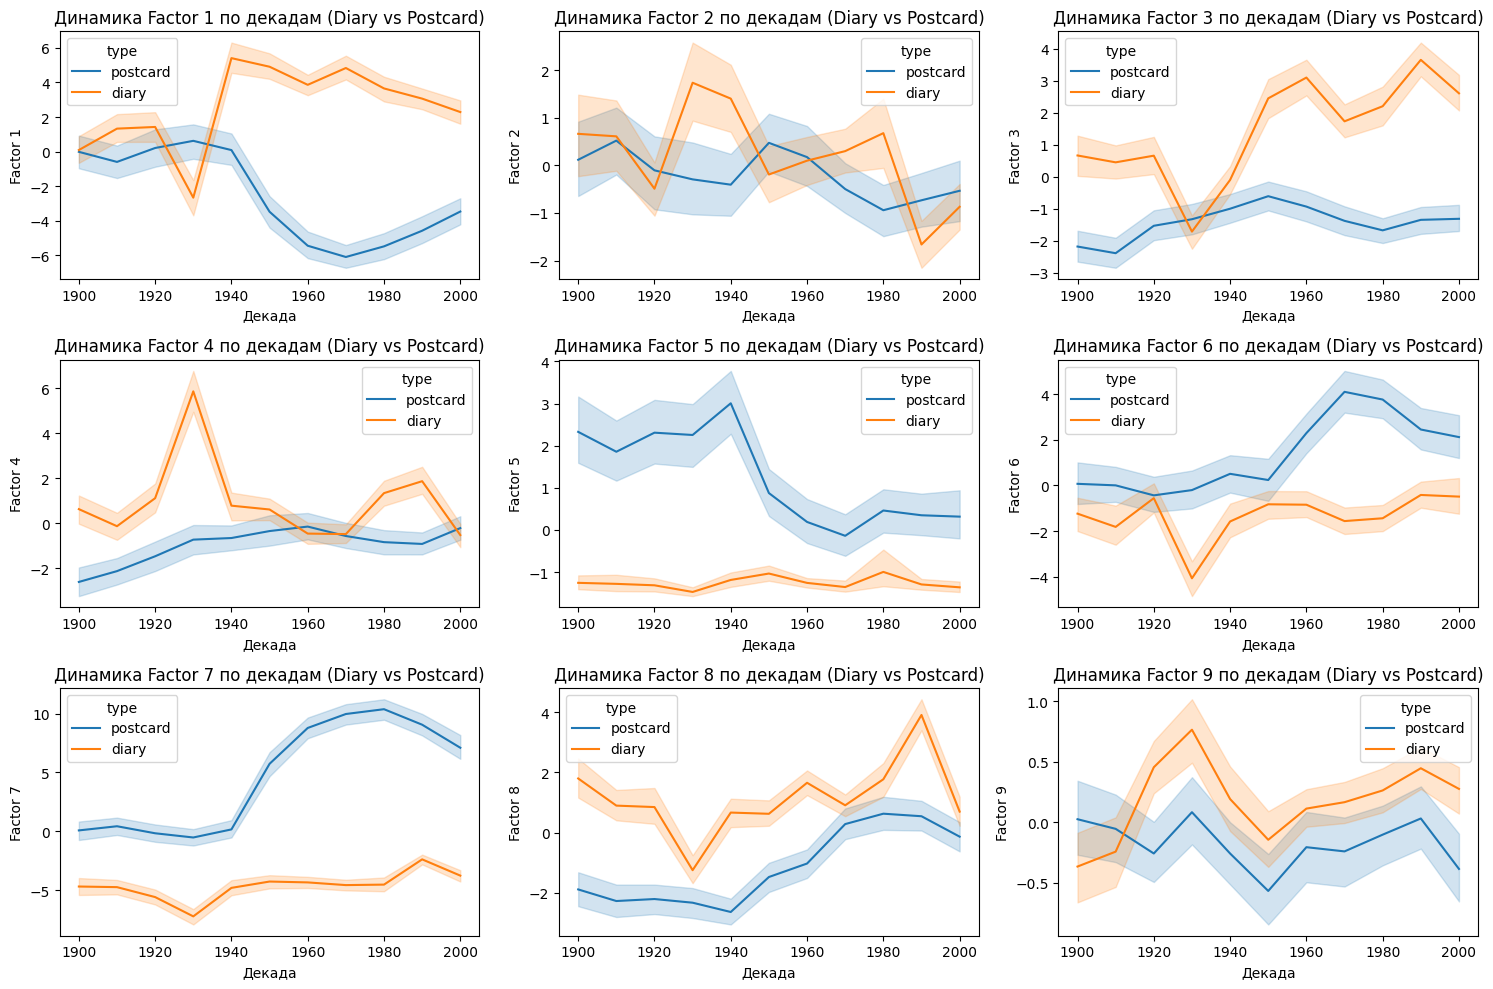

In [247]:
factors = [f'Factor {i}' for i in range(1, 10)]

# Создаем фигуру с подграфиками
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Перебираем факторы и создаем графики
for i, factor in enumerate(factors):
    sns.lineplot(data=factor_scores, x='decade', y=factor, hue='type', ax=axes[i]) #hue параметр
    axes[i].set_title(f'Динамика {factor} по декадам (Diary vs Postcard)')
    axes[i].set_xlabel('Декада')
    axes[i].set_ylabel(factor)

plt.tight_layout()
plt.show()



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

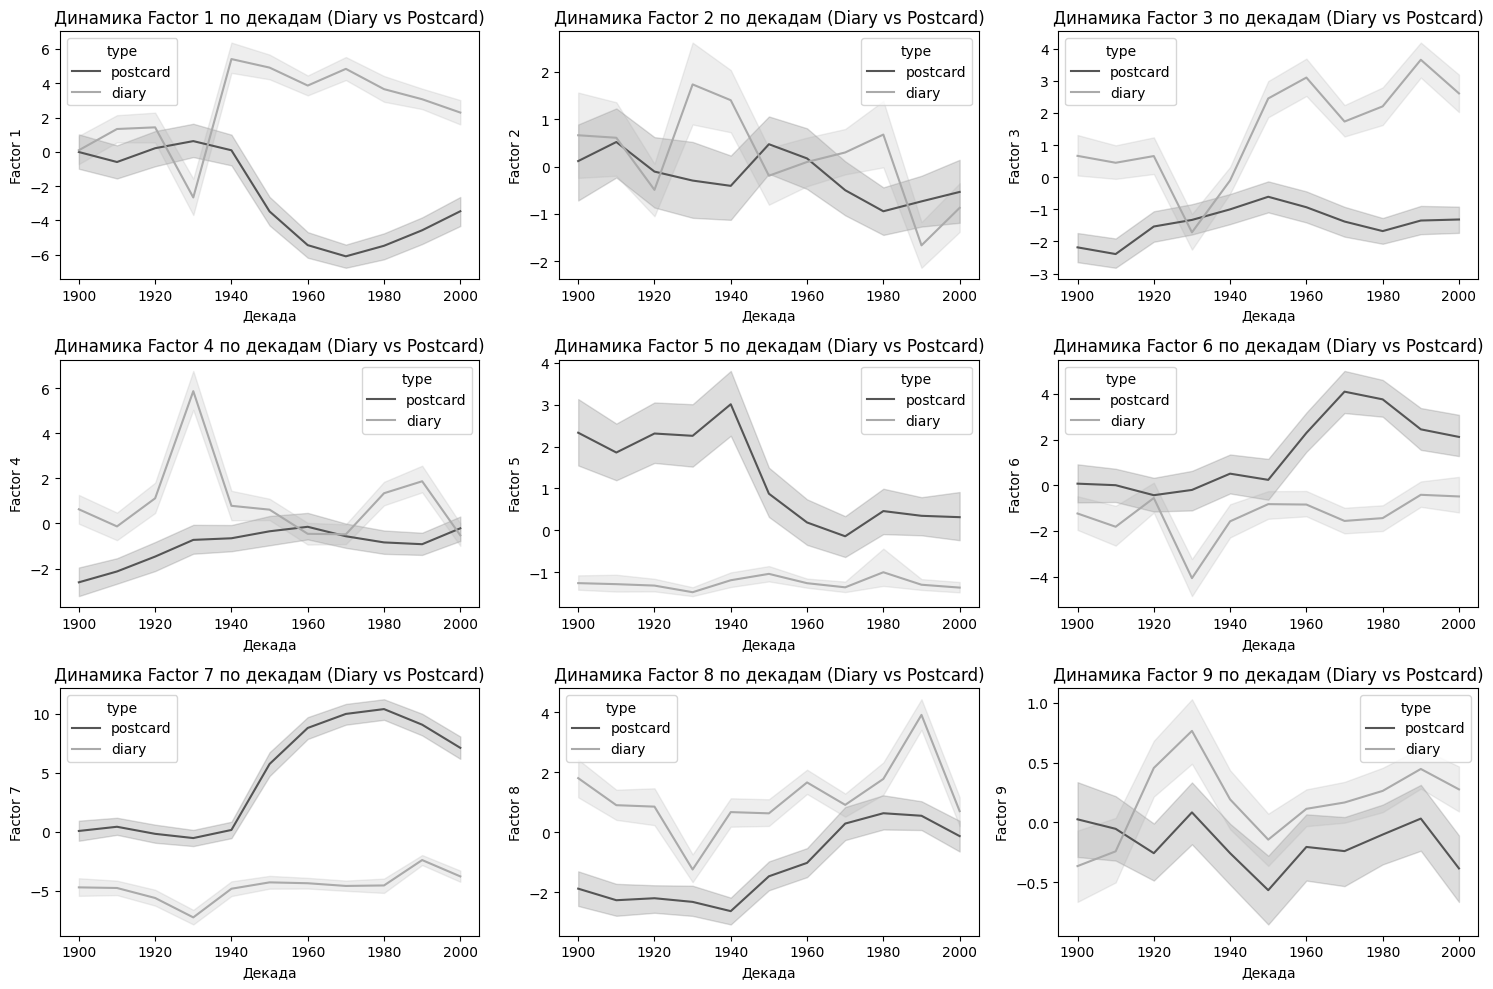

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

factors = [f'Factor {i}' for i in range(1, 10)]

# Создаем фигуру с подграфиками
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Перебираем факторы и создаем графики
for i, factor in enumerate(factors):
    sns.lineplot(data=factor_scores, x='decade', y=factor, hue='type', ax=axes[i], palette='gray')  # Указание палитры
    axes[i].set_title(f'Динамика {factor} по декадам (Diary vs Postcard)')
    axes[i].set_xlabel('Декада')
    axes[i].set_ylabel(factor)

plt.tight_layout()
plt.show()


In [248]:
factor_means_by_decade = factor_scores.copy().drop(columns=['text', 'type'], errors='ignore')

# Группируем по декадам и вычисляем среднее
factor_means_by_decade = factor_means_by_decade.groupby('decade').mean()


# Выводим таблицу
factor_means_by_decade

,Factor 7,Factor 8,Factor 3,Factor 9,Factor 1,Factor 4,Factor 6,Factor 2,Factor 5
decade,,,,,,,,,
1900,-2.312912,-0.044885,-0.759577,-0.169640,0.039986,-0.989254,-0.585892,0.387924,0.536571
1910,-2.161812,-0.688552,-0.971047,-0.147820,0.367604,-1.128132,-0.909721,0.562810,0.288394
1920,-2.884022,-0.679511,-0.438205,0.098637,0.818555,-0.176004,-0.499267,-0.299421,0.497725
1930,-3.883479,-1.788597,-1.522803,0.423825,-1.018954,2.567284,-2.139458,0.718672,0.391330
1940,-2.328085,-0.986128,-0.550735,-0.032495,2.748717,0.063374,-0.538452,0.496149,0.910231
1950,0.731058,-0.425548,0.920855,-0.355042,0.716061,0.132936,-0.297452,0.138727,-0.079793
1960,2.218559,0.313350,1.082934,-0.045919,-0.789282,-0.302811,0.720730,0.133972,-0.533649
1970,2.697800,0.594583,0.176127,-0.036838,-0.628471,-0.523907,1.266186,-0.101102,-0.747478
1980,2.922870,1.199309,0.263672,0.080651,-0.911928,0.250281,1.159094,-0.134652,-0.267502


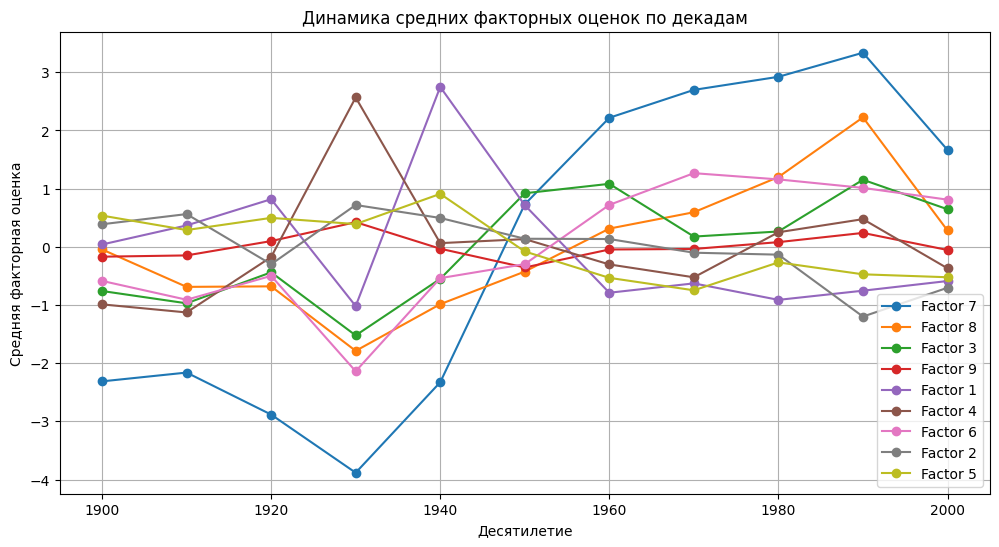

In [249]:
plt.figure(figsize=(12, 6))

# Для каждого фактора строим линию
for factor in factor_means_by_decade.columns:
    if factor.startswith('Factor'):
        plt.plot(
            factor_means_by_decade.index,
            factor_means_by_decade[factor],
            marker='o',
            label=factor
        )

plt.title('Динамика средних факторных оценок по декадам')
plt.xlabel('Десятилетие')
plt.ylabel('Средняя факторная оценка')
plt.legend()
plt.grid(True)
plt.show()

In [250]:
cluster_by_factors = factor_scores.copy()
year = result_df['year'].copy()
cluster_by_factors['year'] = year
cluster_by_factors = cluster_by_factors.drop(['text', 'decade'], axis=1)
cluster_by_factors

,type,Factor 7,Factor 8,Factor 3,Factor 9,Factor 1,Factor 4,Factor 6,Factor 2,Factor 5,year
0,postcard,0.711619,3.328583,1.792193,-2.216892,1.200292,-2.251961,-4.426222,10.971389,10.494877,1906
1,postcard,6.741321,-3.114617,-3.032880,-3.419249,-7.111716,-3.728438,2.709073,-0.414527,-1.738401,1910
2,postcard,1.570666,1.121453,0.101593,2.532480,1.092880,0.902620,-5.172622,-0.494542,-1.738401,1910
3,postcard,1.784405,-2.911030,-6.539669,1.315474,1.562521,-1.368469,-1.507172,5.336410,-1.738401,1910
4,postcard,-0.279477,-4.856575,4.542535,-3.927463,1.165013,-3.186388,0.408441,-3.612380,-0.035094,1906
...,...,...,...,...,...,...,...,...,...,...,...
4439,diary,-0.058127,-2.343336,-4.699669,3.399045,8.627904,1.016332,9.102443,1.022039,-1.738401,1929
4440,diary,5.346799,-2.915649,-1.483916,-1.007470,5.121346,5.128969,-6.084011,-0.259949,0.789807,1936
4441,diary,-5.856687,0.737630,-0.131149,-1.432987,4.987089,-0.746879,-0.916749,3.204848,-1.738401,1962
4442,diary,0.162414,-3.433795,0.117003,-0.351270,-2.815481,-7.204313,-9.666581,-4.299989,-1.738401,1927


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


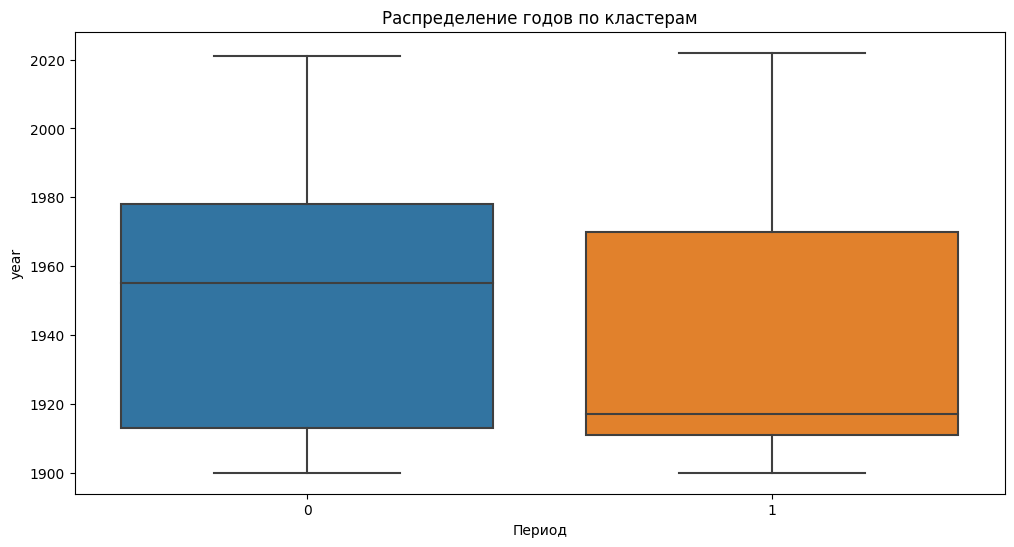

In [251]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Выделяем только факторные оценки (без года)
data_for_clustering = cluster_by_factors[[col for col in cluster_by_factors.columns if col.startswith('Factor')]]

# 2. Стандартизация
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# 4. Кластеризация с оптимальным k (например, k=3)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(data_scaled)
cluster_by_factors['Период'] = clusters

# 5. Визуализация по годам
plt.figure(figsize=(12, 6))
sns.boxplot(x='Период', y='year', data=cluster_by_factors)
plt.title('Распределение годов по кластерам')
plt.show()

# Temporal classification

In [37]:
import pandas as pd
factor_scores = pd.read_csv('/kaggle/input/normal-data/factor_scores.csv', index_col='Unnamed: 0').drop(columns=['decade_class'])

In [38]:


bins_binary = [1900, 1960, 2021]  # Границы интервалов
labels_binary = ['1900-1960', '1960-2020']  # Метки для интервалов
factor_scores['decade_class_binary'] = pd.cut(factor_scores['decade'], bins=bins_binary, labels=labels_binary, right=False)

# Создаём интервалы по 20 лет
bins_20 = list(range(1900, 2021, 20))  # от 1900 до 2020 с шагом 20 лет
labels_20 = [f'{start}-{start+19}' for start in bins_20[:-1]]  # метки для интервалов
factor_scores['decade_class_20yrs'] = pd.cut(factor_scores['decade'], bins=bins_20, labels=labels_20, right=False)


factor_scores


,text,decade,type,Factor 7,Factor 8,Factor 3,Factor 9,Factor 1,Factor 4,Factor 6,Factor 2,Factor 5,decade_class_binary,decade_class_20yrs
0,{Поздравляю <u>[нрзб]</u>}{Поздравляю вас доро...,1900,postcard,0.711619,3.328583,1.792193,-2.216892,1.200292,-2.251961,-4.426222,10.971389,10.494877,1900-1960,1900-1919
1,1903 [нрзб] Многоуважаемая и дорогая Марья Ива...,1900,postcard,6.741321,-3.114617,-3.032880,-3.419249,-7.111716,-3.728438,2.709073,-0.414527,-1.738401,1900-1960,1900-1919
2,Милая матушка прошу пожалуйста прислать мне жа...,1900,postcard,1.570666,1.121453,0.101593,2.532480,1.092880,0.902620,-5.172622,-0.494542,-1.738401,1900-1960,1900-1919
3,Христос Воскресе! Дорогая Ниночка Поздравляю ...,1900,postcard,1.784405,-2.911030,-6.539669,1.315474,1.562521,-1.368469,-1.507172,5.336410,-1.738401,1900-1960,1900-1919
4,{[?Киту] вы такая [?не] озабоченная и суетлива...,1900,postcard,-0.279477,-4.856575,4.542535,-3.927463,1.165013,-3.186388,0.408441,-3.612380,-0.035094,1900-1960,1900-1919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4439,Доклады почти все — полный бред. Не выдержу —...,2000,diary,-0.058127,-2.343336,-4.699669,3.399045,8.627904,1.016332,9.102443,1.022039,-1.738401,1960-2020,2000-2019
4440,И о Тютчеве хочется — и мог бы — написать. Хв...,2000,diary,5.346799,-2.915649,-1.483916,-1.007470,5.121346,5.128969,-6.084011,-0.259949,0.789807,1960-2020,2000-2019
4441,"Вчера звонил, прочитав роман, К.Я. Ваншенкин;...",2000,diary,-5.856687,0.737630,-0.131149,-1.432987,4.987089,-0.746879,-0.916749,3.204848,-1.738401,1960-2020,2000-2019
4442,Именно это говорят про историю с Касьяновым п...,2000,diary,0.162414,-3.433795,0.117003,-0.351270,-2.815481,-7.204313,-9.666581,-4.299989,-1.738401,1960-2020,2000-2019


In [39]:
# Перемешиваем данные
factor_scores_shuffled = factor_scores.sample(frac=1, random_state=42).reset_index(drop=True)

# Проверяем результат
factor_scores_shuffled.head()

,text,decade,type,Factor 7,Factor 8,Factor 3,Factor 9,Factor 1,Factor 4,Factor 6,Factor 2,Factor 5,decade_class_binary,decade_class_20yrs
0,За удовольствие считаю Тому на память написать...,1950,postcard,5.185845,-8.458442,-0.775555,1.225290,-4.819415,-0.267379,-10.048409,10.558137,3.130577,1900-1960,1940-1959
1,<strong>В</strong> <strong>чем</strong> <stro...,1990,diary,-3.694219,6.697591,5.595798,0.553847,2.401499,3.940343,1.730463,-2.996767,-1.287526,1960-2020,1980-1999
2,Здравствуйте Ваня Женя Оля! Поздравляем Вас с ...,1980,postcard,15.860760,0.967615,-1.020406,0.143673,-10.548417,-6.514071,6.202932,1.366396,7.803938,1960-2020,1980-1999
3,Торонто. Расписание встреч от «Кнопф Канада»: ...,1990,diary,-1.028662,1.166839,6.098349,-0.185955,2.305688,0.203340,-1.748797,-1.054843,0.424867,1960-2020,1980-1999
4,Доехали благополучно. Кланяемся всем. Пишите! ...,1900,postcard,-8.236904,0.873103,-7.835365,3.399045,-0.443365,1.805660,-0.026932,8.970512,13.171504,1900-1960,1900-1919


In [40]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
factor_scores_shuffled["decade_binary_encoded"] = encoder.fit_transform(factor_scores_shuffled["decade_class_binary"])
target_decade = factor_scores_shuffled["decade_binary_encoded"].values

encoder_20yrs = LabelEncoder()
factor_scores_shuffled["decade_20yrs_encoded"] = encoder_20yrs.fit_transform(factor_scores_shuffled["decade_class_20yrs"])
target_20yrs = factor_scores_shuffled["decade_20yrs_encoded"].values


encoder_10yrs = LabelEncoder()
factor_scores_shuffled["decade_encoded"] = encoder_10yrs.fit_transform(factor_scores_shuffled["decade"])
target_10yrs = factor_scores_shuffled["decade_encoded"].values


In [41]:
# Выделяем только факторные признаки
factor_features_df = factor_scores_shuffled.filter(regex="Factor").copy()

# Сохраняем имена колонок
factor_columns = factor_features_df.columns.tolist()

# Получаем значения признаков
factor_features = factor_features_df.values


## Binary classification

In [9]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# # Разделение данных
# X_train, X_test, y_train, y_test = train_test_split(
#     factor_features,
#     target,
#     test_size=0.2,
#     stratify=target,
#     random_state=42
# )

X_train_full_binary, X_test_binary, y_train_full_binary, y_test_binary = train_test_split(
    factor_features, target_decade, 
    test_size=0.2, 
    stratify=target_decade, 
    random_state=42
)


X_train_binary, X_val_binary, y_train_binary, y_val_binary = train_test_split(
    X_train_full_binary, y_train_full_binary, 
    test_size=0.2, 
    stratify=y_train_full_binary, 
    random_state=42
)

In [10]:
model_binary = xgb.XGBClassifier(
    objective="binary:logistic",  # Изменено на бинарную классификацию
    n_estimators=500,
    max_depth=7,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    tree_method="hist",
    eval_metric="logloss"
)

model_binary.fit(
    X_train_binary, y_train_binary,
    eval_set=[(X_val_binary, y_val_binary)],  # Контроль переобучения
    early_stopping_rounds=20,   # Остановка, если качество падает
    verbose=10
)

# 5. Предсказание на тестовых данных
y_pred_binary = model_binary.predict(X_test_binary)
print(f"Accuracy: {accuracy_score(y_test_binary, y_pred_binary):.2f}")
print(classification_report(y_test_binary, y_pred_binary))

[0]	validation_0-logloss:0.67333
[10]	validation_0-logloss:0.59654
[20]	validation_0-logloss:0.57555
[30]	validation_0-logloss:0.57092
[40]	validation_0-logloss:0.56952
[50]	validation_0-logloss:0.56904


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[60]	validation_0-logloss:0.56875
[70]	validation_0-logloss:0.57296
[77]	validation_0-logloss:0.57578
Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.73      0.76      0.75       485
           1       0.70      0.67      0.68       404

    accuracy                           0.72       889
   macro avg       0.72      0.71      0.72       889
weighted avg       0.72      0.72      0.72       889



In [11]:
feature_importances = model_binary.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': factor_columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
0,Factor 7,0.173096
1,Factor 8,0.122894
8,Factor 5,0.122312
2,Factor 3,0.102588
4,Factor 1,0.101685
3,Factor 9,0.098349
7,Factor 2,0.098317
5,Factor 4,0.093105
6,Factor 6,0.087653


In [14]:
import numpy as np
class_counts = np.bincount(y_train_binary)
class_probabilities = class_counts / len(y_train_binary)
y_pred_baseline_binary = np.random.choice(len(class_probabilities), size=len(y_test_binary), p=class_probabilities)
baseline_accuracy = accuracy_score(y_test_binary, y_pred_baseline_binary)

print(f"Accuracy бейзлайна: {baseline_accuracy}")

Accuracy бейзлайна: 0.4915635545556805


## 20s classification

In [15]:
X_train_full_20s, X_test_20s, y_train_full_20s, y_test_20s = train_test_split(
    factor_features, target_20yrs, 
    test_size=0.2, 
    stratify=target_20yrs, 
    random_state=42
)


X_train_20s, X_val_20s, y_train_20s, y_val_20s = train_test_split(
    X_train_full_20s, y_train_full_20s, 
    test_size=0.2, 
    stratify=y_train_full_20s, 
    random_state=42
)

In [17]:
model_20s = xgb.XGBClassifier(
    objective="multi:softmax",  # Изменено на бинарную классификацию
    n_estimators=500,
    max_depth=7,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    tree_method="hist",
    eval_metric="mlogloss"
)

model_20s.fit(
    X_train_20s, y_train_20s,
    eval_set=[(X_val_20s, y_val_20s)],  # Контроль переобучения
    early_stopping_rounds=20,   # Остановка, если качество падает
    verbose=10
)

# 5. Предсказание на тестовых данных
y_pred_20s = model_20s.predict(X_test_20s)
print(f"Accuracy: {accuracy_score(y_test_20s, y_pred_20s):.2f}")
print(classification_report(y_test_20s, y_pred_20s))

[0]	validation_0-mlogloss:1.77124
[10]	validation_0-mlogloss:1.66788


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-mlogloss:1.63105
[30]	validation_0-mlogloss:1.61175
[40]	validation_0-mlogloss:1.60605
[50]	validation_0-mlogloss:1.60664
[58]	validation_0-mlogloss:1.61093
Accuracy: 0.36
              precision    recall  f1-score   support

           0       0.36      0.39      0.37       162
           1       0.43      0.45      0.44       161
           2       0.26      0.27      0.26       162
           3       0.36      0.38      0.37       162
           4       0.39      0.44      0.41       161
           5       0.40      0.12      0.19        81

    accuracy                           0.36       889
   macro avg       0.37      0.34      0.34       889
weighted avg       0.36      0.36      0.36       889



In [18]:
feature_importances = model_20s.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': factor_columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
0,Factor 7,0.132385
1,Factor 8,0.119972
4,Factor 1,0.113062
8,Factor 5,0.112521
5,Factor 4,0.107838
7,Factor 2,0.107095
2,Factor 3,0.105155
3,Factor 9,0.104020
6,Factor 6,0.097952


In [19]:
import numpy as np
class_counts = np.bincount(y_train_20s)
class_probabilities = class_counts / len(y_train_20s)
y_pred_baseline_20s = np.random.choice(len(class_probabilities), size=len(y_test_20s), p=class_probabilities)
baseline_accuracy = accuracy_score(y_test_20s, y_pred_baseline_20s)

print(f"Accuracy бейзлайна: {baseline_accuracy}")

Accuracy бейзлайна: 0.172103487064117


<Axes: >

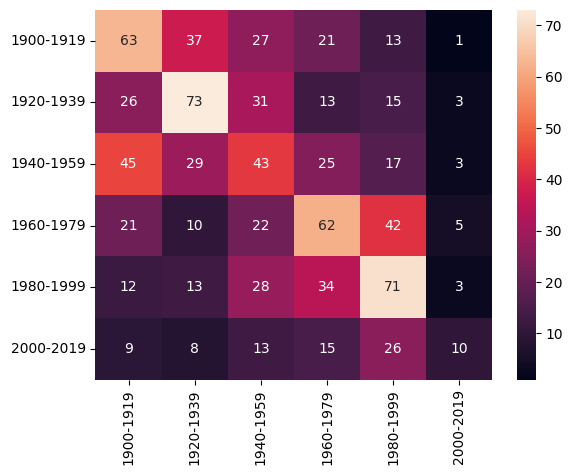

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_20s, y_pred_20s)
decade_labels = [str(decade) for decade in encoder_20yrs.classes_]
sns.heatmap(cm, annot=True, fmt='d', xticklabels=decade_labels, yticklabels=decade_labels)

## 10s classification

In [42]:
X_train_full_10s, X_test_10s, y_train_full_10s, y_test_10s = train_test_split(
    factor_features, target_10yrs, 
    test_size=0.2, 
    stratify=target_10yrs, 
    random_state=42
)


X_train_10s, X_val_10s, y_train_10s, y_val_10s = train_test_split(
    X_train_full_10s, y_train_full_10s, 
    test_size=0.2, 
    stratify=y_train_full_10s, 
    random_state=42
)

In [43]:
model_10s = xgb.XGBClassifier(
    objective="multi:softmax",  # Изменено на бинарную классификацию
    n_estimators=500,
    max_depth=7,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    tree_method="hist",
    eval_metric="mlogloss"
)

model_10s.fit(
    X_train_10s, y_train_10s,
    eval_set=[(X_val_10s, y_val_10s)],  # Контроль переобучения
    early_stopping_rounds=20,   # Остановка, если качество падает
    verbose=10
)

# 5. Предсказание на тестовых данных
y_pred_10s = model_10s.predict(X_test_10s)
print(f"Accuracy: {accuracy_score(y_test_10s, y_pred_10s):.2f}")
print(classification_report(y_test_10s, y_pred_10s))

[0]	validation_0-mlogloss:2.37219


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-mlogloss:2.25487
[20]	validation_0-mlogloss:2.21484
[30]	validation_0-mlogloss:2.20758
[40]	validation_0-mlogloss:2.22032
[46]	validation_0-mlogloss:2.22443
Accuracy: 0.21
              precision    recall  f1-score   support

           0       0.22      0.23      0.22        80
           1       0.15      0.16      0.15        81
           2       0.12      0.11      0.11        81
           3       0.35      0.35      0.35        81
           4       0.19      0.26      0.22        81
           5       0.28      0.14      0.18        80
           6       0.23      0.23      0.23        81
           7       0.20      0.25      0.22        81
           8       0.18      0.14      0.15        81
           9       0.21      0.26      0.23        81
          10       0.26      0.21      0.23        81

    accuracy                           0.21       889
   macro avg       0.22      0.21      0.21       889
weighted avg       0.22      0.21      0.21       88

In [44]:
feature_importances = model_10s.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': factor_columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
0,Factor 7,0.126795
8,Factor 5,0.118965
1,Factor 8,0.111484
4,Factor 1,0.110348
7,Factor 2,0.108828
5,Factor 4,0.108213
2,Factor 3,0.105721
3,Factor 9,0.105491
6,Factor 6,0.104155


In [45]:
import numpy as np
class_counts = np.bincount(y_train_10s)
class_probabilities = class_counts / len(y_train_10s)
y_pred_baseline_10s = np.random.choice(len(class_probabilities), size=len(y_test_10s), p=class_probabilities)
baseline_accuracy = accuracy_score(y_test_10s, y_pred_baseline_10s)

print(f"Accuracy бейзлайна: {baseline_accuracy}")

Accuracy бейзлайна: 0.08773903262092239


<Axes: >

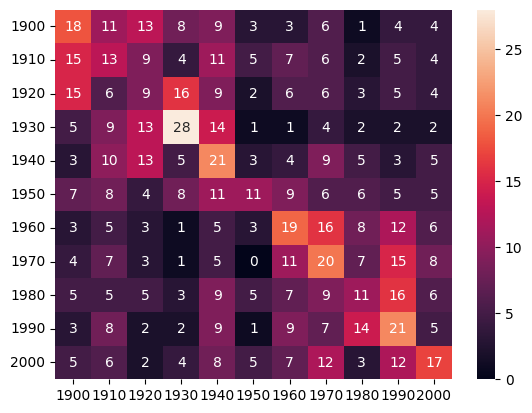

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_10s, y_pred_10s)
decade_labels = [str(decade) for decade in encoder_10yrs.classes_]
sns.heatmap(cm, annot=True, fmt='d', xticklabels=decade_labels, yticklabels=decade_labels)

## Models comparison

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier
)
from sklearn.metrics import classification_report

# Инициализация моделей на основе деревьев
tree_models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Hist Gradient Boosting': HistGradientBoostingClassifier(random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42)  # LightGBM тоже использует деревья
}

for name, model in tree_models.items():
    print(f"\n{'='*30} {name} {'='*30}")
    
    # Обучение модели
    model.fit(X_train_20s, y_train_20s)
    
    # Прогнозирование
    val_pred = model.predict(X_val_20s)
    test_pred = model.predict(X_test_20s)
    
    # Оценка качества
    print("\nValidation Report:")
    print(classification_report(y_val_20s, val_pred))
    
    print("Test Report:")
    print(classification_report(y_test_20s, test_pred))
    
    # Вывод важности признаков (где доступно)
    if hasattr(model, 'feature_importances_'):
        print(f"Feature Importances:\n{model.feature_importances_}")


============================== Decision Tree ==============================

Validation Report:
              precision    recall  f1-score   support

           0       0.27      0.26      0.27       129
           1       0.34      0.35      0.34       130
           2       0.23      0.26      0.25       129
           3       0.27      0.24      0.25       129
           4       0.32      0.29      0.30       129
           5       0.20      0.22      0.21        65

    accuracy                           0.28       711
   macro avg       0.27      0.27      0.27       711
weighted avg       0.28      0.28      0.28       711

Test Report:
              precision    recall  f1-score   support

           0       0.28      0.28      0.28       162
           1       0.34      0.39      0.36       161
           2       0.27      0.23      0.25       162
           3       0.34      0.34      0.34       162
           4       0.33      0.33      0.33       161
           5       0.1

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier
)
from sklearn.metrics import classification_report

# Инициализация моделей на основе деревьев
tree_models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Hist Gradient Boosting': HistGradientBoostingClassifier(random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42)  # LightGBM тоже использует деревья
}

for name, model in tree_models.items():
    print(f"\n{'='*30} {name} {'='*30}")
    
    # Обучение модели
    model.fit(X_train_10s, y_train_10s)
    
    # Прогнозирование
    val_pred = model.predict(X_val_10s)
    test_pred = model.predict(X_test_10s)
    
    # Оценка качества
    print("\nValidation Report:")
    print(classification_report(y_val_10s, val_pred))
    
    print("Test Report:")
    print(classification_report(y_test_10s, test_pred))
    
    # Вывод важности признаков (где доступно)
    if hasattr(model, 'feature_importances_'):
        print(f"Feature Importances:\n{model.feature_importances_}")


============================== Decision Tree ==============================

Validation Report:
              precision    recall  f1-score   support

           0       0.09      0.09      0.09        65
           1       0.09      0.09      0.09        64
           2       0.16      0.16      0.16        64
           3       0.26      0.28      0.27        65
           4       0.07      0.06      0.07        65
           5       0.16      0.15      0.16        65
           6       0.20      0.22      0.21        65
           7       0.15      0.14      0.14        64
           8       0.13      0.09      0.11        65
           9       0.22      0.25      0.24        64
          10       0.14      0.17      0.15        65

    accuracy                           0.15       711
   macro avg       0.15      0.15      0.15       711
weighted avg       0.15      0.15      0.15       711

Test Report:
              precision    recall  f1-score   support

           0       0.1

----------------------